In [2]:
import idx2numpy

# Reading
ndarr = idx2numpy.convert_from_file('data\t10k-images\t10k-images.idx3-ubyte')

f_read = open('myfile.idx', 'rb')
ndarr = idx2numpy.convert_from_file(f_read)

s = f_read.read()
ndarr = idx2numpy.convert_from_string(s)

# Writing 
idx2numpy.convert_to_file('myfile_copy.idx', ndarr)

f_write = open('myfile_copy2.idx', 'w')
idx2numpy.convert_to_file(f_write, ndarr)

s = convert_to_string(ndarr)

OSError: [Errno 22] Invalid argument: 'data\t10k-images\t10k-images.idx3-ubyte'

In [4]:
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.sparse

In [5]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

#Extract feature values and labels from the data
mnist_train_labels = np.array(mnist.train.labels)
mnist_train_images =  np.array(mnist.train.images)
mnist_valid_images =  np.array(mnist.validation.images)
mnist_valid_labels =  np.array(mnist.validation.labels)
mnist_test_labels =  np.array(mnist.test.labels)
mnist_test_images =  np.array(mnist.test.images)


Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [6]:
def log_likelihood(features, target, weights):
    scores = np.dot(features, weights)
    ll = np.sum( target*scores - np.log(1 + np.exp(scores)) )
    return ll 

In [4]:
num_inputs = mnist_train_images.shape[1]
num_outputs = mnist_train_labels.shape[1]
# ...
# Because our task is multiclass classification, 
# we want to assign a probability to each of the classes P(Y=c|X) given the input X. 
# In order to do this we’re going to need one vector of 784 weights for each class, 
# connecting each feature to the corresponding output. Because there are 10 classes, 
# we can collect these weights together in a 784 by 10 matrix.

# We’ll also want to allocate one offset for each of the outputs. 
# We call these offsets the bias term and collect them in the 10-dimensional array b
# ...

W = np.random.rand(num_inputs, num_outputs)
b = np.random.rand(num_outputs)

params = [W, b]

In [7]:
example = mnist_train_images[100]
mnist_train_images.shape
# plt.imshow(np.reshape(example,[28,28]))

(55000, 784)

In [8]:
# ...
# Here we determine the probabilities and predictions for each class when given a set of input data
# ...
def getProbsAndPreds(someX):
    probs = softmax(np.dot(someX,w))
    preds = np.argmax(probs,axis=1)
    return probs,preds


In [9]:
# ...
# Here we perform the softmax transformation: This allows us to get probabilities for each class score that sum to 100%.
# ...
def softmax(z):
    z -= np.max(z)
    sm = (np.exp(z).T / np.sum(np.exp(z),axis=1)).T
    print("Returning softmax : ", sm)
    return sm

In [10]:
# ...
# Here we define the loss function for softmax regression.
# ...
def getLoss(w,x,y,lam):
    m = x.shape[0] #First we get the number of training examples    
    scores = np.dot(x,w) #Then we compute raw class scores given our input and current weights
    prob = softmax(scores) #Next we perform a softmax on these scores to get their probabilities
#     print(prob[0])
    loss = (-1 / m) * np.sum(y * np.log(prob)) + (lam/2)*np.sum(w*w) #We then find the loss of the probabilities
    grad = (-1 / m) * np.dot(x.T,(y - prob)) + lam*w #And compute the gradient for that loss
    return loss,grad

In [11]:
# ...
# This is the main loop of the softmax regression.
# Here we initialize our weights, regularization factor, number of iterations,
# and learning rate. We then loop over a computation of the loss and gradient,
# and application of gradient.
# ...
x = mnist_train_images
y = mnist_train_labels
w = np.zeros([x.shape[1], 10])
lam = 1
iterations = 1000
learningRate = 1e-5
losses = []
for i in range(0,iterations):
    loss,grad = getLoss(w,x,y,lam)
    losses.append(loss)
    print(i,"loss",loss,":gradien:",grad.shape)
    w = w - (learningRate * grad)
print(loss)

Returning softmax :  [[ 0.1  0.1  0.1 ...,  0.1  0.1  0.1]
 [ 0.1  0.1  0.1 ...,  0.1  0.1  0.1]
 [ 0.1  0.1  0.1 ...,  0.1  0.1  0.1]
 ..., 
 [ 0.1  0.1  0.1 ...,  0.1  0.1  0.1]
 [ 0.1  0.1  0.1 ...,  0.1  0.1  0.1]
 [ 0.1  0.1  0.1 ...,  0.1  0.1  0.1]]
0 loss 2.30258509299 :gradien: (784, 10)
Returning softmax :  [[ 0.10000033  0.09999849  0.1000005  ...,  0.10000059  0.10000026
   0.10000038]
 [ 0.10000056  0.09999901  0.10000007 ...,  0.09999972  0.10000126
   0.10000004]
 [ 0.09999988  0.09999834  0.09999959 ...,  0.10000029  0.10000069
   0.10000087]
 ..., 
 [ 0.10000034  0.09999901  0.0999993  ...,  0.09999999  0.10000084
   0.10000032]
 [ 0.10000118  0.09999901  0.10000024 ...,  0.09999955  0.09999993
   0.09999979]
 [ 0.10000061  0.09999928  0.10000023 ...,  0.09999976  0.10000087
   0.10000004]]
1 loss 2.30257426964 :gradien: (784, 10)
Returning softmax :  [[ 0.10000065  0.09999697  0.100001   ...,  0.10000119  0.10000053
   0.10000076]
 [ 0.10000112  0.09999802  0.10000014

15 loss 2.30242277679 :gradien: (784, 10)
Returning softmax :  [[ 0.10000521  0.09997578  0.100008   ...,  0.10000952  0.10000421
   0.10000608]
 [ 0.10000897  0.09998416  0.10000114 ...,  0.09999546  0.10002022
   0.10000063]
 [ 0.09999811  0.09997346  0.09999349 ...,  0.10000459  0.10001108
   0.10001391]
 ..., 
 [ 0.10000545  0.0999841   0.09998879 ...,  0.09999977  0.10001346
   0.10000506]
 [ 0.10001883  0.09998411  0.10000385 ...,  0.09999286  0.09999891
   0.09999657]
 [ 0.10000977  0.09998847  0.10000364 ...,  0.09999608  0.10001387
   0.10000071]]
16 loss 2.30241195831 :gradien: (784, 10)
Returning softmax :  [[ 0.10000553  0.09997427  0.1000085  ...,  0.10001011  0.10000447
   0.10000646]
 [ 0.10000953  0.09998317  0.10000121 ...,  0.09999518  0.10002149
   0.10000067]
 [ 0.099998    0.0999718   0.09999309 ...,  0.10000488  0.10001177
   0.10001478]
 ..., 
 [ 0.10000579  0.0999831   0.09998809 ...,  0.09999976  0.1000143
   0.10000538]
 [ 0.10002001  0.09998312  0.10000409 ..

30 loss 2.3022605337 :gradien: (784, 10)
Returning softmax :  [[ 0.10001008  0.0999531   0.10001549 ...,  0.10001845  0.10000815
   0.10001177]
 [ 0.10001737  0.09996932  0.10000221 ...,  0.09999121  0.10003918
   0.10000121]
 [ 0.09999634  0.09994859  0.09998739 ...,  0.10000889  0.10002146
   0.10002695]
 ..., 
 [ 0.10001056  0.0999692   0.09997828 ...,  0.09999956  0.10002607
   0.1000098 ]
 [ 0.10003648  0.09996922  0.10000745 ...,  0.09998617  0.09999788
   0.09999335]
 [ 0.10001893  0.09997767  0.10000705 ...,  0.09999242  0.10002686
   0.10000138]]
31 loss 2.30224972009 :gradien: (784, 10)
Returning softmax :  [[ 0.1000104   0.09995159  0.10001599 ...,  0.10001904  0.10000841
   0.10001215]
 [ 0.10001793  0.09996834  0.10000228 ...,  0.09999093  0.10004044
   0.10000125]
 [ 0.09999622  0.09994694  0.09998698 ...,  0.10000918  0.10002215
   0.10002782]
 ..., 
 [ 0.1000109   0.0999682   0.09997758 ...,  0.09999954  0.10002691
   0.10001012]
 [ 0.10003766  0.09996823  0.10000769 ..

45 loss 2.30209836368 :gradien: (784, 10)
Returning softmax :  [[ 0.10001495  0.09993043  0.10002298 ...,  0.10002737  0.10001208
   0.10001746]
 [ 0.10002577  0.0999545   0.10000327 ...,  0.09998696  0.10005812
   0.1000018 ]
 [ 0.09999456  0.09992375  0.09998129 ...,  0.1000132   0.10003183
   0.10003998]
 ..., 
 [ 0.10001566  0.09995431  0.09996778 ...,  0.09999934  0.10003868
   0.10001454]
 [ 0.10005413  0.09995434  0.10001105 ...,  0.09997949  0.09999685
   0.09999013]
 [ 0.10002808  0.09996687  0.10001046 ...,  0.09998875  0.10003985
   0.10000205]]
46 loss 2.30208755494 :gradien: (784, 10)
Returning softmax :  [[ 0.10001527  0.09992892  0.10002348 ...,  0.10002797  0.10001235
   0.10001784]
 [ 0.10002633  0.09995351  0.10000334 ...,  0.09998668  0.10005938
   0.10000184]
 [ 0.09999444  0.09992209  0.09998088 ...,  0.10001348  0.10003252
   0.10004085]
 ..., 
 [ 0.100016    0.09995331  0.09996707 ...,  0.09999933  0.10003952
   0.10001486]
 [ 0.10005531  0.09995335  0.10001129 .

60 loss 2.30193626668 :gradien: (784, 10)
Returning softmax :  [[ 0.10001981  0.09990778  0.10003046 ...,  0.1000363   0.10001601
   0.10002315]
 [ 0.10003415  0.09993969  0.10000433 ...,  0.09998272  0.10007706
   0.10000238]
 [ 0.09999278  0.09989891  0.09997518 ...,  0.1000175   0.1000422
   0.10005302]
 ..., 
 [ 0.10002076  0.09993943  0.09995727 ...,  0.09999913  0.10005128
   0.10001928]
 [ 0.10007177  0.09993948  0.10001465 ...,  0.0999728   0.09999581
   0.09998691]
 [ 0.10003722  0.09995608  0.10001386 ...,  0.09998509  0.10005284
   0.10000271]]
61 loss 2.30192546281 :gradien: (784, 10)
Returning softmax :  [[ 0.10002013  0.09990627  0.10003096 ...,  0.10003689  0.10001627
   0.10002353]
 [ 0.10003471  0.0999387   0.1000044  ...,  0.09998243  0.10007832
   0.10000242]
 [ 0.09999266  0.09989726  0.09997477 ...,  0.10001779  0.10004289
   0.10005389]
 ..., 
 [ 0.1000211   0.09993843  0.09995657 ...,  0.09999912  0.10005212
   0.1000196 ]
 [ 0.10007295  0.09993849  0.10001488 ..

75 loss 2.30177424267 :gradien: (784, 10)
Returning softmax :  [[ 0.10002466  0.09988514  0.10003795 ...,  0.10004522  0.10001993
   0.10002884]
 [ 0.10004253  0.09992489  0.10000538 ...,  0.09997847  0.10009599
   0.10000296]
 [ 0.09999099  0.0998741   0.09996907 ...,  0.1000218   0.10005256
   0.10006605]
 ..., 
 [ 0.10002585  0.09992456  0.09994676 ...,  0.09999892  0.10006388
   0.10002402]
 [ 0.10008941  0.09992462  0.10001824 ...,  0.09996612  0.09999477
   0.0999837 ]
 [ 0.10004637  0.09994531  0.10001727 ...,  0.09998142  0.10006582
   0.10000338]]
76 loss 2.30176344367 :gradien: (784, 10)
Returning softmax :  [[ 0.10002498  0.09988363  0.10003844 ...,  0.10004582  0.1000202
   0.10002922]
 [ 0.10004309  0.09992391  0.10000545 ...,  0.09997819  0.10009725
   0.100003  ]
 [ 0.09999087  0.09987245  0.09996867 ...,  0.10002209  0.10005325
   0.10006692]
 ..., 
 [ 0.10002619  0.09992357  0.09994606 ...,  0.0999989   0.10006472
   0.10002433]
 [ 0.10009058  0.09992363  0.10001848 ..

90 loss 2.30161229161 :gradien: (784, 10)
Returning softmax :  [[ 0.10002951  0.09986252  0.10004542 ...,  0.10005415  0.10002385
   0.10003453]
 [ 0.1000509   0.09991011  0.10000643 ...,  0.09997423  0.10011491
   0.10000354]
 [ 0.09998919  0.0998493   0.09996297 ...,  0.10002611  0.10006291
   0.10007908]
 ..., 
 [ 0.10003094  0.0999097   0.09993626 ...,  0.09999871  0.10007647
   0.10002875]
 [ 0.10010704  0.09990977  0.10002183 ...,  0.09995945  0.09999373
   0.09998048]
 [ 0.1000555   0.09993454  0.10002067 ...,  0.09997776  0.10007879
   0.10000404]]
91 loss 2.30160149746 :gradien: (784, 10)
Returning softmax :  [[ 0.10002983  0.09986101  0.10004592 ...,  0.10005474  0.10002411
   0.10003491]
 [ 0.10005146  0.09990912  0.1000065  ...,  0.09997395  0.10011617
   0.10000358]
 [ 0.09998907  0.09984765  0.09996256 ...,  0.10002639  0.1000636
   0.10007995]
 ..., 
 [ 0.10003127  0.09990871  0.09993556 ...,  0.09999869  0.10007731
   0.10002907]
 [ 0.10010821  0.09990878  0.10002207 ..

105 loss 2.30145041345 :gradien: (784, 10)
Returning softmax :  [[ 0.10003435  0.09983991  0.1000529  ...,  0.10006308  0.10002776
   0.10004021]
 [ 0.10005926  0.09989533  0.10000748 ...,  0.09996999  0.10013383
   0.10000412]
 [ 0.09998739  0.09982452  0.09995686 ...,  0.10003041  0.10007326
   0.10009211]
 ..., 
 [ 0.10003602  0.09989485  0.09992575 ...,  0.0999985   0.10008906
   0.10003349]
 [ 0.10012466  0.09989493  0.10002542 ...,  0.09995277  0.09999268
   0.09997726]
 [ 0.10006463  0.09992378  0.10002407 ...,  0.0999741   0.10009176
   0.10000471]]
106 loss 2.30143962416 :gradien: (784, 10)
Returning softmax :  [[ 0.10003467  0.09983841  0.1000534  ...,  0.10006367  0.10002802
   0.10004059]
 [ 0.10005982  0.09989435  0.10000755 ...,  0.0999697   0.10013509
   0.10000416]
 [ 0.09998727  0.09982287  0.09995645 ...,  0.1000307   0.10007395
   0.10009298]
 ..., 
 [ 0.10003635  0.09989386  0.09992505 ...,  0.09999848  0.1000899
   0.1000338 ]
 [ 0.10012584  0.09989394  0.10002566 

120 loss 2.30128860815 :gradien: (784, 10)
Returning softmax :  [[ 0.10003918  0.09981732  0.10006037 ...,  0.100072    0.10003166
   0.1000459 ]
 [ 0.10006761  0.09988057  0.10000852 ...,  0.09996575  0.10015273
   0.1000047 ]
 [ 0.09998559  0.09979976  0.09995075 ...,  0.10003471  0.1000836
   0.10010513]
 ..., 
 [ 0.10004109  0.09988001  0.09991525 ...,  0.09999829  0.10010164
   0.10003822]
 [ 0.10014229  0.0998801   0.100029   ...,  0.0999461   0.09999163
   0.09997404]
 [ 0.10007376  0.09991302  0.10002746 ...,  0.09997045  0.10010473
   0.10000537]]
121 loss 2.30127782372 :gradien: (784, 10)
Returning softmax :  [[ 0.1000395   0.09981582  0.10006087 ...,  0.1000726   0.10003192
   0.10004627]
 [ 0.10006817  0.09987959  0.10000859 ...,  0.09996547  0.10015399
   0.10000474]
 [ 0.09998547  0.09979811  0.09995034 ...,  0.100035    0.10008429
   0.100106  ]
 ..., 
 [ 0.10004143  0.09987902  0.09991455 ...,  0.09999828  0.10010248
   0.10003854]
 [ 0.10014346  0.09987912  0.10002924 

135 loss 2.30112687567 :gradien: (784, 10)
Returning softmax :  [[ 0.10004401  0.09979475  0.10006784 ...,  0.10008093  0.10003556
   0.10005158]
 [ 0.10007596  0.09986582  0.10000956 ...,  0.09996151  0.10017164
   0.10000527]
 [ 0.09998378  0.09977502  0.09994464 ...,  0.10003902  0.10009394
   0.10011816]
 ..., 
 [ 0.10004616  0.09986518  0.09990475 ...,  0.09999808  0.10011422
   0.10004295]
 [ 0.1001599   0.09986528  0.10003259 ...,  0.09993942  0.09999057
   0.09997082]
 [ 0.10008288  0.09990228  0.10003085 ...,  0.09996679  0.10011769
   0.10000603]]
136 loss 2.30111609609 :gradien: (784, 10)
Returning softmax :  [[ 0.10004433  0.09979325  0.10006833 ...,  0.10008153  0.10003582
   0.10005196]
 [ 0.10007651  0.09986484  0.10000963 ...,  0.09996123  0.1001729
   0.10000531]
 [ 0.09998366  0.09977337  0.09994423 ...,  0.1000393   0.10009462
   0.10011903]
 ..., 
 [ 0.1000465   0.0998642   0.09990405 ...,  0.09999807  0.10011506
   0.10004327]
 [ 0.10016108  0.0998643   0.10003282 

150 loss 2.30096521597 :gradien: (784, 10)
Returning softmax :  [[ 0.10004883  0.09977219  0.1000753  ...,  0.10008986  0.10003945
   0.10005726]
 [ 0.10008429  0.09985109  0.1000106  ...,  0.09995728  0.10019053
   0.10000585]
 [ 0.09998196  0.09975029  0.09993852 ...,  0.10004332  0.10010426
   0.10013118]
 ..., 
 [ 0.10005122  0.09985037  0.09989425 ...,  0.09999788  0.10012679
   0.10004768]
 [ 0.10017751  0.09985048  0.10003617 ...,  0.09993276  0.09998951
   0.09996761]
 [ 0.10009199  0.09989154  0.10003424 ...,  0.09996314  0.10013065
   0.1000067 ]]
151 loss 2.30095444125 :gradien: (784, 10)
Returning softmax :  [[ 0.10004915  0.09977069  0.1000758  ...,  0.10009045  0.10003971
   0.10005763]
 [ 0.10008485  0.09985011  0.10001066 ...,  0.099957    0.10019179
   0.10000589]
 [ 0.09998184  0.09974864  0.09993811 ...,  0.10004361  0.10010495
   0.10013205]
 ..., 
 [ 0.10005156  0.09984938  0.09989355 ...,  0.09999786  0.10012763
   0.100048  ]
 [ 0.10017869  0.09984949  0.1000364 

165 loss 2.30080362902 :gradien: (784, 10)
Returning softmax :  [[ 0.10005364  0.09974965  0.10008276 ...,  0.10009879  0.10004334
   0.10006293]
 [ 0.10009262  0.09983636  0.10001163 ...,  0.09995305  0.10020942
   0.10000642]
 [ 0.09998014  0.09972557  0.09993241 ...,  0.10004762  0.10011458
   0.1001442 ]
 ..., 
 [ 0.10005628  0.09983556  0.09988374 ...,  0.09999767  0.10013935
   0.10005241]
 [ 0.10019512  0.09983568  0.10003974 ...,  0.09992609  0.09998845
   0.09996439]
 [ 0.1001011   0.09988081  0.10003763 ...,  0.09995949  0.1001436
   0.10000736]]
166 loss 2.30079285914 :gradien: (784, 10)
Returning softmax :  [[ 0.10005396  0.09974815  0.10008326 ...,  0.10009938  0.1000436
   0.10006331]
 [ 0.10009318  0.09983538  0.10001169 ...,  0.09995277  0.10021067
   0.10000646]
 [ 0.09998002  0.09972393  0.099932   ...,  0.10004791  0.10011527
   0.10014507]
 ..., 
 [ 0.10005662  0.09983457  0.09988304 ...,  0.09999766  0.10014019
   0.10005273]
 [ 0.1001963   0.09983469  0.10003998 .

180 loss 2.30064211476 :gradien: (784, 10)
Returning softmax :  [[ 0.10005845  0.09972713  0.10009021 ...,  0.10010772  0.10004722
   0.10006861]
 [ 0.10010094  0.09982165  0.10001265 ...,  0.09994882  0.10022829
   0.10000699]
 [ 0.09997831  0.09970088  0.09992629 ...,  0.10005193  0.1001249
   0.10015722]
 ..., 
 [ 0.10006134  0.09982076  0.09987324 ...,  0.09999746  0.10015191
   0.10005714]
 [ 0.10021272  0.09982089  0.10004332 ...,  0.09991943  0.09998738
   0.09996117]
 [ 0.10011021  0.09987009  0.10004102 ...,  0.09995584  0.10015654
   0.10000802]]
181 loss 2.30063134973 :gradien: (784, 10)
Returning softmax :  [[ 0.10005877  0.09972563  0.10009071 ...,  0.10010831  0.10004747
   0.10006899]
 [ 0.1001015   0.09982067  0.10001272 ...,  0.09994854  0.10022955
   0.10000703]
 [ 0.09997819  0.09969923  0.09992588 ...,  0.10005221  0.10012559
   0.10015809]
 ..., 
 [ 0.10006167  0.09981978  0.09987254 ...,  0.09999745  0.10015275
   0.10005745]
 [ 0.1002139   0.0998199   0.10004355 

195 loss 2.30048067316 :gradien: (784, 10)
Returning softmax :  [[ 0.10006325  0.09970462  0.10009767 ...,  0.10011664  0.10005109
   0.10007428]
 [ 0.10010925  0.09980695  0.10001368 ...,  0.09994459  0.10024717
   0.10000756]
 [ 0.09997648  0.0996762   0.09992017 ...,  0.10005623  0.10013521
   0.10017024]
 ..., 
 [ 0.10006638  0.09980597  0.09986274 ...,  0.09999726  0.10016447
   0.10006187]
 [ 0.10023032  0.09980611  0.10004689 ...,  0.09991277  0.09998631
   0.09995795]
 [ 0.10011931  0.09985938  0.1000444  ...,  0.09995219  0.10016949
   0.10000868]]
196 loss 2.30046991297 :gradien: (784, 10)
Returning softmax :  [[ 0.10006357  0.09970312  0.10009816 ...,  0.10011724  0.10005135
   0.10007466]
 [ 0.10010981  0.09980598  0.10001374 ...,  0.09994431  0.10024842
   0.1000076 ]
 [ 0.09997636  0.09967456  0.09991977 ...,  0.10005652  0.1001359
   0.1001711 ]
 ..., 
 [ 0.10006672  0.09980499  0.09986204 ...,  0.09999725  0.1001653
   0.10006218]
 [ 0.10023149  0.09980512  0.10004712 .

210 loss 2.30031930418 :gradien: (784, 10)
Returning softmax :  [[ 0.10006805  0.09968213  0.10010512 ...,  0.10012557  0.10005495
   0.10007996]
 [ 0.10011756  0.09979227  0.10001469 ...,  0.09994036  0.10026603
   0.10000813]
 [ 0.09997465  0.09965154  0.09991406 ...,  0.10006053  0.10014551
   0.10018325]
 ..., 
 [ 0.10007143  0.0997912   0.09985225 ...,  0.09999706  0.10017702
   0.10006659]
 [ 0.10024791  0.09979133  0.10005045 ...,  0.09990611  0.09998523
   0.09995474]
 [ 0.1001284   0.09984868  0.10004778 ...,  0.09994855  0.10018242
   0.10000934]]
211 loss 2.30030854883 :gradien: (784, 10)
Returning softmax :  [[ 0.10006837  0.09968063  0.10010561 ...,  0.10012617  0.10005521
   0.10008033]
 [ 0.10011811  0.09979129  0.10001476 ...,  0.09994008  0.10026729
   0.10000817]
 [ 0.09997452  0.09964989  0.09991365 ...,  0.10006082  0.1001462
   0.10018412]
 ..., 
 [ 0.10007176  0.09979021  0.09985155 ...,  0.09999704  0.10017785
   0.10006691]
 [ 0.10024909  0.09979035  0.10005069 

225 loss 2.30015800777 :gradien: (784, 10)
Returning softmax :  [[ 0.10007283  0.09965965  0.10011256 ...,  0.1001345   0.10005881
   0.10008563]
 [ 0.10012585  0.09977759  0.10001571 ...,  0.09993614  0.10028489
   0.1000087 ]
 [ 0.0999728   0.09962689  0.09990794 ...,  0.10006484  0.10015581
   0.10019626]
 ..., 
 [ 0.10007646  0.09977643  0.09984175 ...,  0.09999686  0.10018956
   0.10007131]
 [ 0.1002655   0.09977657  0.10005402 ...,  0.09989945  0.09998415
   0.09995152]
 [ 0.10013749  0.09983798  0.10005116 ...,  0.09994491  0.10019536
   0.10001001]]
226 loss 2.30014725726 :gradien: (784, 10)
Returning softmax :  [[ 0.10007315  0.09965815  0.10011306 ...,  0.1001351   0.10005907
   0.100086  ]
 [ 0.1001264   0.09977662  0.10001578 ...,  0.09993586  0.10028615
   0.10000874]
 [ 0.09997268  0.09962525  0.09990753 ...,  0.10006512  0.10015649
   0.10019713]
 ..., 
 [ 0.1000768   0.09977545  0.09984105 ...,  0.09999684  0.1001904
   0.10007163]
 [ 0.10026667  0.09977559  0.10005426 

240 loss 2.2999967839 :gradien: (784, 10)
Returning softmax :  [[ 0.10007762  0.09963719  0.10012    ...,  0.10014343  0.10006267
   0.1000913 ]
 [ 0.10013414  0.09976293  0.10001672 ...,  0.09993192  0.10030374
   0.10000927]
 [ 0.09997095  0.09960227  0.09990181 ...,  0.10006914  0.1001661
   0.10020927]
 ..., 
 [ 0.1000815   0.09976168  0.09983125 ...,  0.09999665  0.1002021
   0.10007603]
 [ 0.10028308  0.09976182  0.10005758 ...,  0.0998928   0.09998307
   0.0999483 ]
 [ 0.10014658  0.09982729  0.10005453 ...,  0.09994127  0.10020828
   0.10001067]]
241 loss 2.29998603822 :gradien: (784, 10)
Returning softmax :  [[ 0.10007793  0.09963569  0.1001205  ...,  0.10014403  0.10006293
   0.10009167]
 [ 0.10013469  0.09976196  0.10001679 ...,  0.09993164  0.100305
   0.10000931]
 [ 0.09997083  0.09960062  0.09990141 ...,  0.10006943  0.10016678
   0.10021014]
 ..., 
 [ 0.10008183  0.09976069  0.09983055 ...,  0.09999664  0.10020293
   0.10007635]
 [ 0.10028425  0.09976084  0.10005782 ...,

255 loss 2.29983563252 :gradien: (784, 10)
Returning softmax :  [[ 0.10008239  0.09961474  0.10012744 ...,  0.10015236  0.10006652
   0.10009696]
 [ 0.10014242  0.09974828  0.10001773 ...,  0.0999277   0.10032258
   0.10000983]
 [ 0.0999691   0.09957765  0.09989569 ...,  0.10007344  0.10017638
   0.10022228]
 ..., 
 [ 0.10008652  0.09974693  0.09982075 ...,  0.09999645  0.10021463
   0.10008076]
 [ 0.10030066  0.09974708  0.10006114 ...,  0.09988615  0.09998198
   0.09994508]
 [ 0.10015566  0.09981662  0.1000579  ...,  0.09993763  0.10022121
   0.10001132]]
256 loss 2.29982489168 :gradien: (784, 10)
Returning softmax :  [[ 0.10008271  0.09961325  0.10012794 ...,  0.10015296  0.10006677
   0.10009734]
 [ 0.10014297  0.09974731  0.10001779 ...,  0.09992742  0.10032384
   0.10000987]
 [ 0.09996898  0.09957601  0.09989528 ...,  0.10007373  0.10017706
   0.10022315]
 ..., 
 [ 0.10008686  0.09974595  0.09982006 ...,  0.09999644  0.10021547
   0.10008107]
 [ 0.10030183  0.0997461   0.10006138

270 loss 2.2996745536 :gradien: (784, 10)
Returning softmax :  [[ 0.10008716  0.09959231  0.10013487 ...,  0.10016129  0.10007036
   0.10010263]
 [ 0.10015069  0.09973365  0.10001873 ...,  0.09992349  0.10034142
   0.1000104 ]
 [ 0.09996724  0.09955306  0.09988957 ...,  0.10007775  0.10018666
   0.10023529]
 ..., 
 [ 0.10009154  0.09973219  0.09981026 ...,  0.09999625  0.10022716
   0.10008547]
 [ 0.10031823  0.09973235  0.1000647  ...,  0.0998795   0.09998088
   0.09994186]
 [ 0.10016473  0.09980594  0.10006127 ...,  0.09993399  0.10023412
   0.10001198]]
271 loss 2.29966381758 :gradien: (784, 10)
Returning softmax :  [[ 0.10008748  0.09959082  0.10013537 ...,  0.10016189  0.10007061
   0.10010301]
 [ 0.10015124  0.09973267  0.1000188  ...,  0.0999232   0.10034267
   0.10001043]
 [ 0.09996712  0.09955142  0.09988916 ...,  0.10007804  0.10018734
   0.10023616]
 ..., 
 [ 0.10009188  0.09973121  0.09980956 ...,  0.09999624  0.10022799
   0.10008579]
 [ 0.1003194   0.09973137  0.10006493 

285 loss 2.29951354709 :gradien: (784, 10)
Returning softmax :  [[ 0.10009192  0.0995699   0.1001423  ...,  0.10017022  0.10007419
   0.10010829]
 [ 0.10015895  0.09971902  0.10001973 ...,  0.09991927  0.10036025
   0.10001096]
 [ 0.09996538  0.09952848  0.09988344 ...,  0.10008205  0.10019693
   0.10024829]
 ..., 
 [ 0.10009656  0.09971747  0.09979976 ...,  0.09999606  0.10023968
   0.10009019]
 [ 0.1003358   0.09971763  0.10006825 ...,  0.09987285  0.09997979
   0.09993865]
 [ 0.1001738   0.09979528  0.10006464 ...,  0.09993036  0.10024704
   0.10001264]]
286 loss 2.2995028159 :gradien: (784, 10)
Returning softmax :  [[ 0.10009224  0.09956841  0.1001428  ...,  0.10017082  0.10007445
   0.10010867]
 [ 0.1001595   0.09971805  0.10001979 ...,  0.09991899  0.1003615   0.100011  ]
 [ 0.09996526  0.09952684  0.09988303 ...,  0.10008234  0.10019761
   0.10024916]
 ..., 
 [ 0.10009689  0.09971649  0.09979907 ...,  0.09999604  0.10024052
   0.10009051]
 [ 0.10033697  0.09971664  0.10006849 ..

300 loss 2.29935261296 :gradien: (784, 10)
Returning softmax :  [[ 0.10009668  0.0995475   0.10014973 ...,  0.10017915  0.10007802
   0.10011395]
 [ 0.1001672   0.09970441  0.10002072 ...,  0.09991506  0.10037907
   0.10001152]
 [ 0.09996351  0.09950392  0.09987732 ...,  0.10008636  0.10020719
   0.10026129]
 ..., 
 [ 0.10010157  0.09970275  0.09978927 ...,  0.09999586  0.1002522
   0.10009491]
 [ 0.10035336  0.09970291  0.1000718  ...,  0.09986621  0.09997869
   0.09993543]
 [ 0.10018287  0.09978463  0.100068   ...,  0.09992672  0.10025995
   0.1000133 ]]
301 loss 2.29934188659 :gradien: (784, 10)
Returning softmax :  [[ 0.10009699  0.09954601  0.10015023 ...,  0.10017975  0.10007828
   0.10011433]
 [ 0.10016775  0.09970344  0.10002079 ...,  0.09991478  0.10038032
   0.10001156]
 [ 0.09996339  0.09950228  0.09987691 ...,  0.10008664  0.10020787
   0.10026216]
 ..., 
 [ 0.1001019   0.09970177  0.09978857 ...,  0.09999585  0.10025303
   0.10009522]
 [ 0.10035453  0.09970193  0.10007204 

315 loss 2.29919175115 :gradien: (784, 10)
Returning softmax :  [[ 0.10010142  0.09952512  0.10015715 ...,  0.10018809  0.10008185
   0.10011961]
 [ 0.10017545  0.09968981  0.10002171 ...,  0.09991085  0.10039788
   0.10001208]
 [ 0.09996164  0.09947938  0.09987119 ...,  0.10009066  0.10021745
   0.1002743 ]
 ..., 
 [ 0.10010657  0.09968805  0.09977878 ...,  0.09999566  0.10026471
   0.10009962]
 [ 0.10037092  0.09968821  0.10007535 ...,  0.09985957  0.09997758
   0.09993221]
 [ 0.10019192  0.09977398  0.10007137 ...,  0.09992309  0.10027285
   0.10001396]]
316 loss 2.29918102961 :gradien: (784, 10)
Returning softmax :  [[ 0.10010174  0.09952363  0.10015765 ...,  0.10018868  0.1000821
   0.10011999]
 [ 0.100176    0.09968884  0.10002178 ...,  0.09991057  0.10039913
   0.10001212]
 [ 0.09996151  0.09947774  0.09987078 ...,  0.10009095  0.10021813
   0.10027516]
 ..., 
 [ 0.10010691  0.09968707  0.09977808 ...,  0.09999565  0.10026554
   0.10009994]
 [ 0.10037209  0.09968723  0.10007558 

330 loss 2.29903096164 :gradien: (784, 10)
Returning softmax :  [[ 0.10010617  0.09950276  0.10016457 ...,  0.10019702  0.10008566
   0.10012527]
 [ 0.10018369  0.09967523  0.1000227  ...,  0.09990664  0.10041669
   0.10001264]
 [ 0.09995976  0.09945485  0.09986506 ...,  0.10009496  0.1002277
   0.10028729]
 ..., 
 [ 0.10011157  0.09967335  0.09976829 ...,  0.09999547  0.10027722
   0.10010434]
 [ 0.10038848  0.09967352  0.10007889 ...,  0.09985293  0.09997647
   0.09992899]
 [ 0.10020098  0.09976334  0.10007472 ...,  0.09991946  0.10028575
   0.10001462]]
331 loss 2.29902024491 :gradien: (784, 10)
Returning softmax :  [[ 0.10010648  0.09950127  0.10016507 ...,  0.10019761  0.10008592
   0.10012565]
 [ 0.10018424  0.09967425  0.10002277 ...,  0.09990636  0.10041794
   0.10001268]
 [ 0.09995963  0.09945322  0.09986465 ...,  0.10009525  0.10022838
   0.10028816]
 ..., 
 [ 0.10011191  0.09967237  0.09976759 ...,  0.09999545  0.10027805
   0.10010465]
 [ 0.10038965  0.09967254  0.10007913 

345 loss 2.29887024438 :gradien: (784, 10)
Returning softmax :  [[ 0.1001109   0.09948041  0.10017199 ...,  0.10020595  0.10008948
   0.10013093]
 [ 0.10019192  0.09966065  0.10002368 ...,  0.09990244  0.10043549
   0.1000132 ]
 [ 0.09995787  0.09943034  0.09985893 ...,  0.10009927  0.10023794
   0.10030029]
 ..., 
 [ 0.10011657  0.09965867  0.09975779 ...,  0.09999527  0.10028972
   0.10010905]
 [ 0.10040602  0.09965883  0.10008244 ...,  0.09984629  0.09997536
   0.09992577]
 [ 0.10021003  0.09975271  0.10007808 ...,  0.09991583  0.10029864
   0.10001527]]
346 loss 2.29885953247 :gradien: (784, 10)
Returning softmax :  [[ 0.10011122  0.09947892  0.10017248 ...,  0.10020655  0.10008973
   0.1001313 ]
 [ 0.10019246  0.09965968  0.10002375 ...,  0.09990215  0.10043674
   0.10001323]
 [ 0.09995775  0.09942871  0.09985852 ...,  0.10009956  0.10023863
   0.10030116]
 ..., 
 [ 0.1001169   0.09965769  0.09975709 ...,  0.09999526  0.10029055
   0.10010936]
 [ 0.10040719  0.09965785  0.10008267

360 loss 2.29870959933 :gradien: (784, 10)
Returning softmax :  [[ 0.10011563  0.09945807  0.1001794  ...,  0.10021488  0.10009328
   0.10013658]
 [ 0.10020014  0.09964609  0.10002466 ...,  0.09989823  0.10045428
   0.10001375]
 [ 0.09995598  0.09940585  0.0998528  ...,  0.10010357  0.10024818
   0.10031329]
 ..., 
 [ 0.10012156  0.09964399  0.0997473  ...,  0.09999508  0.10030221
   0.10011376]
 [ 0.10042357  0.09964416  0.10008597 ...,  0.09983966  0.09997424
   0.09992256]
 [ 0.10021907  0.09974209  0.10008144 ...,  0.09991221  0.10031153
   0.10001593]]
361 loss 2.29869889223 :gradien: (784, 10)
Returning softmax :  [[ 0.10011595  0.09945658  0.1001799  ...,  0.10021548  0.10009354
   0.10013696]
 [ 0.10020069  0.09964512  0.10002473 ...,  0.09989795  0.10045553
   0.10001379]
 [ 0.09995586  0.09940421  0.09985239 ...,  0.10010386  0.10024886
   0.10031415]
 ..., 
 [ 0.10012189  0.09964301  0.0997466  ...,  0.09999507  0.10030304
   0.10011407]
 [ 0.10042474  0.09964318  0.10008621

375 loss 2.29854902645 :gradien: (784, 10)
Returning softmax :  [[ 0.10012035  0.09943575  0.10018681 ...,  0.10022381  0.10009708
   0.10014223]
 [ 0.10020835  0.09963154  0.10002564 ...,  0.09989403  0.10047306
   0.1000143 ]
 [ 0.09995409  0.09938137  0.09984666 ...,  0.10010788  0.10025841
   0.10032628]
 ..., 
 [ 0.10012654  0.09962933  0.09973681 ...,  0.09999489  0.1003147
   0.10011847]
 [ 0.10044111  0.09962949  0.10008951 ...,  0.09983303  0.09997312
   0.09991934]
 [ 0.10022811  0.09973148  0.10008479 ...,  0.09990859  0.10032442
   0.10001658]]
376 loss 2.29853832416 :gradien: (784, 10)
Returning softmax :  [[ 0.10012067  0.09943427  0.1001873  ...,  0.10022441  0.10009733
   0.10014261]
 [ 0.1002089   0.09963057  0.1000257  ...,  0.09989375  0.10047432
   0.10001434]
 [ 0.09995396  0.09937974  0.09984625 ...,  0.10010816  0.10025909
   0.10032714]
 ..., 
 [ 0.10012687  0.09962835  0.09973611 ...,  0.09999487  0.10031553
   0.10011878]
 [ 0.10044227  0.09962851  0.10008975 

390 loss 2.2983885257 :gradien: (784, 10)
Returning softmax :  [[ 0.10012507  0.09941345  0.10019422 ...,  0.10023275  0.10010087
   0.10014789]
 [ 0.10021656  0.099617    0.10002661 ...,  0.09988983  0.10049184
   0.10001486]
 [ 0.09995219  0.09935691  0.09984053 ...,  0.10011218  0.10026864
   0.10033927]
 ..., 
 [ 0.10013152  0.09961467  0.09972633 ...,  0.0999947   0.10032719
   0.10012317]
 [ 0.10045864  0.09961484  0.10009304 ...,  0.0998264   0.09997199
   0.09991612]
 [ 0.10023715  0.09972087  0.10008814 ...,  0.09990496  0.1003373
   0.10001724]]
391 loss 2.29837782821 :gradien: (784, 10)
Returning softmax :  [[ 0.10012538  0.09941196  0.10019471 ...,  0.10023334  0.10010113
   0.10014826]
 [ 0.1002171   0.09961603  0.10002668 ...,  0.09988955  0.10049309
   0.10001489]
 [ 0.09995206  0.09935528  0.09984012 ...,  0.10011247  0.10026932
   0.10034013]
 ..., 
 [ 0.10013185  0.0996137   0.09972563 ...,  0.09999468  0.10032802
   0.10012349]
 [ 0.10045981  0.09961386  0.10009328 .

405 loss 2.29822809704 :gradien: (784, 10)
Returning softmax :  [[ 0.10012978  0.09939116  0.10020162 ...,  0.10024168  0.10010466
   0.10015354]
 [ 0.10022475  0.09960248  0.10002758 ...,  0.09988563  0.10051061
   0.10001541]
 [ 0.09995028  0.09933246  0.09983439 ...,  0.10011649  0.10027886
   0.10035226]
 ..., 
 [ 0.10013649  0.09960003  0.09971584 ...,  0.0999945   0.10033967
   0.10012788]
 [ 0.10047617  0.09960019  0.10009657 ...,  0.09981977  0.09997086
   0.0999129 ]
 [ 0.10024618  0.09971027  0.10009148 ...,  0.09990134  0.10035017
   0.1000179 ]]
406 loss 2.29821740436 :gradien: (784, 10)
Returning softmax :  [[ 0.10013009  0.09938968  0.10020211 ...,  0.10024228  0.10010491
   0.10015391]
 [ 0.1002253   0.09960151  0.10002764 ...,  0.09988535  0.10051186
   0.10001545]
 [ 0.09995015  0.09933083  0.09983398 ...,  0.10011677  0.10027954
   0.10035312]
 ..., 
 [ 0.10013682  0.09959905  0.09971514 ...,  0.09999449  0.1003405
   0.10012819]
 [ 0.10047734  0.09959921  0.10009681 

420 loss 2.29806774043 :gradien: (784, 10)
Returning softmax :  [[ 0.10013448  0.09936889  0.10020901 ...,  0.10025061  0.10010844
   0.10015918]
 [ 0.10023294  0.09958796  0.10002854 ...,  0.09988144  0.10052938
   0.10001596]
 [ 0.09994837  0.09930804  0.09982826 ...,  0.10012079  0.10028907
   0.10036524]
 ..., 
 [ 0.10014146  0.09958539  0.09970535 ...,  0.09999431  0.10035214
   0.10013258]
 [ 0.10049369  0.09958555  0.1001001  ...,  0.09981315  0.09996973
   0.09990969]
 [ 0.1002552   0.09969968  0.10009483 ...,  0.09989773  0.10036304
   0.10001855]]
421 loss 2.29805705255 :gradien: (784, 10)
Returning softmax :  [[ 0.1001348   0.09936741  0.10020951 ...,  0.10025121  0.10010869
   0.10015956]
 [ 0.10023349  0.099587    0.10002861 ...,  0.09988116  0.10053063
   0.100016  ]
 [ 0.09994824  0.09930641  0.09982785 ...,  0.10012108  0.10028975
   0.10036611]
 ..., 
 [ 0.10014179  0.09958442  0.09970465 ...,  0.0999943   0.10035297
   0.1001329 ]
 [ 0.10049486  0.09958458  0.10010034

435 loss 2.29790745582 :gradien: (784, 10)
Returning softmax :  [[ 0.10013918  0.09934664  0.10021641 ...,  0.10025955  0.10011222
   0.10016483]
 [ 0.10024112  0.09957346  0.1000295  ...,  0.09987725  0.10054813
   0.10001651]
 [ 0.09994645  0.09928362  0.09982212 ...,  0.10012509  0.10029928
   0.10037823]
 ..., 
 [ 0.10014642  0.09957077  0.09969486 ...,  0.09999413  0.10036461
   0.10013729]
 [ 0.10051121  0.09957093  0.10010363 ...,  0.09980653  0.09996859
   0.09990647]
 [ 0.10026422  0.0996891   0.10009817 ...,  0.09989411  0.10037591
   0.1000192 ]]
436 loss 2.29789677274 :gradien: (784, 10)
Returning softmax :  [[ 0.10013949  0.09934515  0.1002169  ...,  0.10026014  0.10011247
   0.1001652 ]
 [ 0.10024167  0.0995725   0.10002957 ...,  0.09987697  0.10054938
   0.10001655]
 [ 0.09994633  0.099282    0.09982171 ...,  0.10012538  0.10029996
   0.10037909]
 ..., 
 [ 0.10014675  0.0995698   0.09969416 ...,  0.09999411  0.10036544
   0.1001376 ]
 [ 0.10051238  0.09956995  0.10010386

450 loss 2.29774724319 :gradien: (784, 10)
Returning softmax :  [[ 0.10014387  0.0993244   0.1002238  ...,  0.10026848  0.10011599
   0.10017047]
 [ 0.10024929  0.09955897  0.10003046 ...,  0.09987306  0.10056688
   0.10001706]
 [ 0.09994453  0.09925923  0.09981598 ...,  0.1001294   0.10030948
   0.10039121]
 ..., 
 [ 0.10015138  0.09955616  0.09968438 ...,  0.09999394  0.10037707
   0.10014199]
 [ 0.10052872  0.09955631  0.10010715 ...,  0.09979991  0.09996745
   0.09990325]
 [ 0.10027323  0.09967853  0.10010151 ...,  0.0998905   0.10038877
   0.10001986]]
451 loss 2.2977365649 :gradien: (784, 10)
Returning softmax :  [[ 0.10014418  0.09932292  0.10022429 ...,  0.10026908  0.10011624
   0.10017085]
 [ 0.10024984  0.09955801  0.10003052 ...,  0.09987278  0.10056813
   0.10001709]
 [ 0.0999444   0.0992576   0.09981557 ...,  0.10012969  0.10031016
   0.10039208]
 ..., 
 [ 0.10015171  0.09955518  0.09968368 ...,  0.09999393  0.1003779
   0.1001423 ]
 [ 0.10052989  0.09955533  0.10010738 .

465 loss 2.29758710248 :gradien: (784, 10)
Returning softmax :  [[ 0.10014855  0.09930217  0.10023119 ...,  0.10027742  0.10011975
   0.10017611]
 [ 0.10025746  0.0995445   0.10003141 ...,  0.09986887  0.10058562
   0.1000176 ]
 [ 0.09994261  0.09923485  0.09980984 ...,  0.1001337   0.10031967
   0.10040419]
 ..., 
 [ 0.10015633  0.09954155  0.09967389 ...,  0.09999375  0.10038953
   0.10014669]
 [ 0.10054623  0.0995417   0.10011067 ...,  0.09979329  0.0999663
   0.09990003]
 [ 0.10028224  0.09966796  0.10010485 ...,  0.09988689  0.10040162
   0.10002051]]
466 loss 2.29757642899 :gradien: (784, 10)
Returning softmax :  [[ 0.10014887  0.09930069  0.10023168 ...,  0.10027801  0.10012     0.10017649]
 [ 0.100258    0.09954353  0.10003147 ...,  0.09986859  0.10058687
   0.10001764]
 [ 0.09994248  0.09923323  0.09980943 ...,  0.10013399  0.10032035
   0.10040506]
 ..., 
 [ 0.10015666  0.09954058  0.09967319 ...,  0.09999374  0.10039036
   0.100147  ]
 [ 0.1005474   0.09954073  0.1001109  ..

480 loss 2.29742703366 :gradien: (784, 10)
Returning softmax :  [[ 0.10015323  0.09927997  0.10023857 ...,  0.10028635  0.10012351
   0.10018175]
 [ 0.10026562  0.09953003  0.10003236 ...,  0.09986468  0.10060436
   0.10001815]
 [ 0.09994068  0.09921049  0.09980369 ...,  0.10013801  0.10032986
   0.10041717]
 ..., 
 [ 0.10016128  0.09952696  0.09966341 ...,  0.09999356  0.10040198
   0.10015139]
 [ 0.10056374  0.0995271   0.10011418 ...,  0.09978668  0.09996515
   0.09989682]
 [ 0.10029125  0.0996574   0.10010818 ...,  0.09988328  0.10041447
   0.10002116]]
481 loss 2.29741636496 :gradien: (784, 10)
Returning softmax :  [[ 0.10015354  0.09927849  0.10023906 ...,  0.10028695  0.10012376
   0.10018213]
 [ 0.10026616  0.09952907  0.10003242 ...,  0.0998644   0.1006056
   0.10001818]
 [ 0.09994055  0.09920887  0.09980328 ...,  0.10013829  0.10033054
   0.10041804]
 ..., 
 [ 0.10016161  0.09952599  0.09966271 ...,  0.09999355  0.10040281
   0.1001517 ]
 [ 0.10056491  0.09952613  0.10011442 

495 loss 2.29726703669 :gradien: (784, 10)
Returning softmax :  [[ 0.1001579   0.09925777  0.10024595 ...,  0.10029529  0.10012726
   0.10018739]
 [ 0.10027376  0.09951558  0.1000333  ...,  0.0998605   0.10062308
   0.10001869]
 [ 0.09993874  0.09918615  0.09979755 ...,  0.10014231  0.10034004
   0.10043015]
 ..., 
 [ 0.10016622  0.09951237  0.09965293 ...,  0.09999338  0.10041443
   0.10015609]
 [ 0.10058124  0.09951251  0.1001177  ...,  0.09978007  0.099964    0.0998936 ]
 [ 0.10030025  0.09964685  0.10011151 ...,  0.09987967  0.10042732
   0.10002181]]
496 loss 2.29725637278 :gradien: (784, 10)
Returning softmax :  [[ 0.10015821  0.09925629  0.10024644 ...,  0.10029588  0.10012751
   0.10018777]
 [ 0.10027431  0.09951462  0.10003337 ...,  0.09986022  0.10062433
   0.10001873]
 [ 0.09993861  0.09918452  0.09979714 ...,  0.1001426   0.10034072
   0.10043101]
 ..., 
 [ 0.10016655  0.0995114   0.09965223 ...,  0.09999337  0.10041526
   0.1001564 ]
 [ 0.1005824   0.09951154  0.10011793 .

510 loss 2.29710711153 :gradien: (784, 10)
Returning softmax :  [[ 0.10016257  0.0992356   0.10025332 ...,  0.10030422  0.100131
   0.10019303]
 [ 0.1002819   0.09950114  0.10003424 ...,  0.09985631  0.1006418
   0.10001923]
 [ 0.0999368   0.09916182  0.09979141 ...,  0.10014662  0.10035021
   0.10044312]
 ..., 
 [ 0.10017115  0.0994978   0.09964244 ...,  0.0999932   0.10042687
   0.10016078]
 [ 0.10059873  0.09949793  0.10012121 ...,  0.09977346  0.09996284
   0.09989038]
 [ 0.10030924  0.09963631  0.10011484 ...,  0.09987606  0.10044016
   0.10002247]]
511 loss 2.2970964524 :gradien: (784, 10)
Returning softmax :  [[ 0.10016288  0.09923412  0.10025382 ...,  0.10030482  0.10013125
   0.10019341]
 [ 0.10028245  0.09950018  0.10003431 ...,  0.09985604  0.10064305
   0.10001927]
 [ 0.09993667  0.0991602   0.099791   ...,  0.1001469   0.10035089
   0.10044399]
 ..., 
 [ 0.10017148  0.09949683  0.09964175 ...,  0.09999318  0.1004277
   0.1001611 ]
 [ 0.1005999   0.09949696  0.10012144 ...,

525 loss 2.29694725813 :gradien: (784, 10)
Returning softmax :  [[ 0.10016722  0.09921343  0.1002607  ...,  0.10031316  0.10013474
   0.10019867]
 [ 0.10029004  0.09948671  0.10003518 ...,  0.09985213  0.10066052
   0.10001977]
 [ 0.09993485  0.09913751  0.09978526 ...,  0.10015092  0.10036038
   0.1004561 ]
 ..., 
 [ 0.10017608  0.09948324  0.09963196 ...,  0.09999301  0.10043931
   0.10016548]
 [ 0.10061622  0.09948336  0.10012472 ...,  0.09976685  0.09996168
   0.09988716]
 [ 0.10031823  0.09962578  0.10011817 ...,  0.09987246  0.100453
   0.10002312]]
526 loss 2.29693660379 :gradien: (784, 10)
Returning softmax :  [[ 0.10016753  0.09921196  0.10026119 ...,  0.10031375  0.10013499
   0.10019904]
 [ 0.10029058  0.09948575  0.10003524 ...,  0.09985186  0.10066176
   0.10001981]
 [ 0.09993472  0.09913589  0.09978485 ...,  0.10015121  0.10036106
   0.10045696]
 ..., 
 [ 0.10017641  0.09948227  0.09963126 ...,  0.099993    0.10044014
   0.10016579]
 [ 0.10061739  0.09948239  0.10012495 .

540 loss 2.29678747646 :gradien: (784, 10)
Returning softmax :  [[ 0.10017188  0.09919129  0.10026807 ...,  0.10032209  0.10013847
   0.1002043 ]
 [ 0.10029816  0.0994723   0.10003611 ...,  0.09984796  0.10067922
   0.10002031]
 [ 0.0999329   0.09911321  0.09977911 ...,  0.10015523  0.10037054
   0.10046907]
 ..., 
 [ 0.10018101  0.09946868  0.09962148 ...,  0.09999283  0.10045174
   0.10017017]
 [ 0.10063371  0.0994688   0.10012822 ...,  0.09976025  0.09996052
   0.09988395]
 [ 0.10032721  0.09961525  0.10012149 ...,  0.09986886  0.10046583
   0.10002377]]
541 loss 2.2967768269 :gradien: (784, 10)
Returning softmax :  [[ 0.10017218  0.09918981  0.10026856 ...,  0.10032269  0.10013872
   0.10020467]
 [ 0.1002987   0.09947134  0.10003618 ...,  0.09984768  0.10068047
   0.10002035]
 [ 0.09993277  0.09911159  0.0997787  ...,  0.10015551  0.10037122
   0.10046993]
 ..., 
 [ 0.10018134  0.09946771  0.09962078 ...,  0.09999282  0.10045257
   0.10017048]
 [ 0.10063487  0.09946783  0.10012845 

555 loss 2.29662776648 :gradien: (784, 10)
Returning softmax :  [[ 0.10017652  0.09916916  0.10027543 ...,  0.10033103  0.1001422
   0.10020993]
 [ 0.10030627  0.09945789  0.10003704 ...,  0.09984378  0.10069792
   0.10002085]
 [ 0.09993094  0.09908893  0.09977296 ...,  0.10015953  0.1003807
   0.10048204]
 ..., 
 [ 0.10018593  0.09945414  0.099611   ...,  0.09999265  0.10046417
   0.10017486]
 [ 0.10065119  0.09945425  0.10013172 ...,  0.09975365  0.09995935
   0.09988073]
 [ 0.10033619  0.09960474  0.10012482 ...,  0.09986526  0.10047866
   0.10002442]]
556 loss 2.2966171217 :gradien: (784, 10)
Returning softmax :  [[ 0.10017683  0.09916768  0.10027592 ...,  0.10033163  0.10014245
   0.10021031]
 [ 0.10030682  0.09945693  0.1000371  ...,  0.0998435   0.10069917
   0.10002089]
 [ 0.09993081  0.09908732  0.09977255 ...,  0.10015982  0.10038137
   0.1004829 ]
 ..., 
 [ 0.10018625  0.09945317  0.0996103  ...,  0.09999264  0.10046499
   0.10017518]
 [ 0.10065235  0.09945328  0.10013196 ..

570 loss 2.29646812814 :gradien: (784, 10)
Returning softmax :  [[ 0.10018116  0.09914704  0.10028279 ...,  0.10033997  0.10014592
   0.10021556]
 [ 0.10031438  0.0994435   0.10003797 ...,  0.09983961  0.10071661
   0.10002139]
 [ 0.09992898  0.09906467  0.09976681 ...,  0.10016384  0.10039085
   0.100495  ]
 ..., 
 [ 0.10019084  0.0994396   0.09960052 ...,  0.09999247  0.10047659
   0.10017955]
 [ 0.10066866  0.09943971  0.10013522 ...,  0.09974705  0.09995817
   0.09987751]
 [ 0.10034516  0.09959423  0.10012813 ...,  0.09986166  0.10049148
   0.10002507]]
571 loss 2.29645748814 :gradien: (784, 10)
Returning softmax :  [[ 0.10018147  0.09914557  0.10028328 ...,  0.10034056  0.10014617
   0.10021594]
 [ 0.10031492  0.09944254  0.10003803 ...,  0.09983933  0.10071786
   0.10002142]
 [ 0.09992884  0.09906305  0.0997664  ...,  0.10016412  0.10039152
   0.10049587]
 ..., 
 [ 0.10019117  0.09943864  0.09959983 ...,  0.09999246  0.10047741
   0.10017987]
 [ 0.10066983  0.09943874  0.10013546

585 loss 2.29630856142 :gradien: (784, 10)
Returning softmax :  [[ 0.10018579  0.09912495  0.10029015 ...,  0.1003489   0.10014963
   0.10022119]
 [ 0.10032248  0.09942912  0.10003889 ...,  0.09983544  0.10073529
   0.10002192]
 [ 0.09992701  0.09904043  0.09976066 ...,  0.10016814  0.10040099
   0.10050797]
 ..., 
 [ 0.10019575  0.09942508  0.09959005 ...,  0.09999229  0.100489
   0.10018424]
 [ 0.10068613  0.09942518  0.10013872 ...,  0.09974045  0.09995699
   0.09987429]
 [ 0.10035413  0.09958373  0.10013145 ...,  0.09985806  0.1005043
   0.10002572]]
586 loss 2.29629792618 :gradien: (784, 10)
Returning softmax :  [[ 0.1001861   0.09912347  0.10029064 ...,  0.1003495   0.10014988
   0.10022156]
 [ 0.10032302  0.09942816  0.10003895 ...,  0.09983516  0.10073654
   0.10002196]
 [ 0.09992688  0.09903881  0.09976025 ...,  0.10016843  0.10040166
   0.10050883]
 ..., 
 [ 0.10019608  0.09942411  0.09958935 ...,  0.09999228  0.10048983
   0.10018456]
 [ 0.1006873   0.09942421  0.10013895 ..

600 loss 2.29614906626 :gradien: (784, 10)
Returning softmax :  [[ 0.10019042  0.09910286  0.10029751 ...,  0.10035784  0.10015334
   0.10022682]
 [ 0.10033057  0.09941476  0.10003981 ...,  0.09983127  0.10075397
   0.10002246]
 [ 0.09992503  0.0990162   0.09975451 ...,  0.10017245  0.10041112
   0.10052093]
 ..., 
 [ 0.10020065  0.09941057  0.09957957 ...,  0.09999211  0.10050141
   0.10018893]
 [ 0.1007036   0.09941066  0.10014221 ...,  0.09973386  0.09995581
   0.09987108]
 [ 0.1003631   0.09957323  0.10013477 ...,  0.09985447  0.10051711
   0.10002637]]
601 loss 2.29613843579 :gradien: (784, 10)
Returning softmax :  [[ 0.10019072  0.09910139  0.100298   ...,  0.10035844  0.10015359
   0.10022719]
 [ 0.10033111  0.0994138   0.10003987 ...,  0.09983099  0.10075522
   0.10002249]
 [ 0.0999249   0.09901458  0.0997541  ...,  0.10017273  0.1004118
   0.10052179]
 ..., 
 [ 0.10020098  0.0994096   0.09957887 ...,  0.0999921   0.10050224
   0.10018924]
 [ 0.10070476  0.09940969  0.10014245 

615 loss 2.29598964262 :gradien: (784, 10)
Returning softmax :  [[ 0.10019504  0.09908079  0.10030486 ...,  0.10036678  0.10015704
   0.10023244]
 [ 0.10033866  0.0994004   0.10004072 ...,  0.0998271   0.10077264
   0.10002299]
 [ 0.09992306  0.09899198  0.09974836 ...,  0.10017675  0.10042125
   0.10053389]
 ..., 
 [ 0.10020555  0.09939606  0.09956909 ...,  0.09999193  0.10051382
   0.10019362]
 [ 0.10072106  0.09939614  0.1001457  ...,  0.09972727  0.09995463
   0.09986786]
 [ 0.10037206  0.09956275  0.10013808 ...,  0.09985088  0.10052992
   0.10002701]]
616 loss 2.29597901692 :gradien: (784, 10)
Returning softmax :  [[ 0.10019534  0.09907932  0.10030535 ...,  0.10036738  0.10015729
   0.10023282]
 [ 0.10033919  0.09939944  0.10004078 ...,  0.09982682  0.10077388
   0.10002303]
 [ 0.09992292  0.09899037  0.09974795 ...,  0.10017704  0.10042193
   0.10053476]
 ..., 
 [ 0.10020588  0.0993951   0.09956839 ...,  0.09999192  0.10051464
   0.10019393]
 [ 0.10072222  0.09939517  0.10014594

630 loss 2.29583029048 :gradien: (784, 10)
Returning softmax :  [[ 0.10019965  0.09905874  0.1003122  ...,  0.10037572  0.10016074
   0.10023806]
 [ 0.10034673  0.09938606  0.10004163 ...,  0.09982294  0.1007913
   0.10002352]
 [ 0.09992107  0.09896779  0.0997422  ...,  0.10018106  0.10043138
   0.10054685]
 ..., 
 [ 0.10021045  0.09938157  0.09955862 ...,  0.09999176  0.10052622
   0.1001983 ]
 [ 0.10073851  0.09938164  0.10014919 ...,  0.09972068  0.09995344
   0.09986464]
 [ 0.10038101  0.09955227  0.10014139 ...,  0.09984728  0.10054273
   0.10002766]]
631 loss 2.29581966954 :gradien: (784, 10)
Returning softmax :  [[ 0.10019996  0.09905727  0.10031269 ...,  0.10037631  0.10016099
   0.10023844]
 [ 0.10034727  0.0993851   0.10004169 ...,  0.09982266  0.10079255
   0.10002356]
 [ 0.09992094  0.09896617  0.09974179 ...,  0.10018134  0.10043205
   0.10054771]
 ..., 
 [ 0.10021077  0.0993806   0.09955792 ...,  0.09999174  0.10052704
   0.10019861]
 [ 0.10073968  0.09938067  0.10014942 

645 loss 2.29567100978 :gradien: (784, 10)
Returning softmax :  [[ 0.10020425  0.0990367   0.10031955 ...,  0.10038466  0.10016443
   0.10024368]
 [ 0.1003548   0.09937173  0.10004254 ...,  0.09981877  0.10080996
   0.10002405]
 [ 0.09991908  0.09894361  0.09973605 ...,  0.10018536  0.1004415
   0.10055981]
 ..., 
 [ 0.10021533  0.09936708  0.09954814 ...,  0.09999158  0.10053861
   0.10020299]
 [ 0.10075596  0.09936714  0.10015268 ...,  0.09971409  0.09995224
   0.09986143]
 [ 0.10038996  0.0995418   0.10014469 ...,  0.0998437   0.10055553
   0.10002831]]
646 loss 2.29566039361 :gradien: (784, 10)
Returning softmax :  [[ 0.10020456  0.09903524  0.10032004 ...,  0.10038525  0.10016468
   0.10024406]
 [ 0.10035534  0.09937077  0.1000426  ...,  0.0998185   0.1008112
   0.10002409]
 [ 0.09991895  0.09894199  0.09973564 ...,  0.10018565  0.10044217
   0.10056067]
 ..., 
 [ 0.10021566  0.09936612  0.09954744 ...,  0.09999157  0.10053944
   0.1002033 ]
 [ 0.10075713  0.09936618  0.10015291 .

660 loss 2.29551180049 :gradien: (784, 10)
Returning softmax :  [[ 0.10020885  0.09901468  0.10032689 ...,  0.1003936   0.10016812
   0.1002493 ]
 [ 0.10036286  0.09935741  0.10004344 ...,  0.09981461  0.10082861
   0.10002458]
 [ 0.09991709  0.09891944  0.09972989 ...,  0.10018967  0.10045161
   0.10057276]
 ..., 
 [ 0.10022022  0.09935261  0.09953767 ...,  0.09999141  0.100551
   0.10020767]
 [ 0.10077341  0.09935266  0.10015616 ...,  0.09970751  0.09995105
   0.09985821]
 [ 0.1003989   0.09953134  0.100148   ...,  0.09984011  0.10056832
   0.10002896]]
661 loss 2.29550118908 :gradien: (784, 10)
Returning softmax :  [[ 0.10020916  0.09901322  0.10032738 ...,  0.10039419  0.10016836
   0.10024968]
 [ 0.10036339  0.09935645  0.1000435  ...,  0.09981434  0.10082985
   0.10002462]
 [ 0.09991696  0.09891783  0.09972948 ...,  0.10018995  0.10045228
   0.10057363]
 ..., 
 [ 0.10022054  0.09935165  0.09953697 ...,  0.09999139  0.10055183
   0.10020798]
 [ 0.10077457  0.09935169  0.10015639 .

675 loss 2.29535266257 :gradien: (784, 10)
Returning softmax :  [[ 0.10021345  0.09899268  0.10033422 ...,  0.10040253  0.10017179
   0.10025492]
 [ 0.10037091  0.0993431   0.10004434 ...,  0.09981046  0.10084725
   0.10002511]
 [ 0.09991509  0.0988953   0.09972373 ...,  0.10019397  0.10046171
   0.10058572]
 ..., 
 [ 0.10022509  0.09933815  0.0995272  ...,  0.09999123  0.10056338
   0.10021235]
 [ 0.10079085  0.09933818  0.10015964 ...,  0.09970093  0.09994984
   0.09985499]
 [ 0.10040784  0.09952088  0.1001513  ...,  0.09983652  0.10058111
   0.1000296 ]]
676 loss 2.29534205591 :gradien: (784, 10)
Returning softmax :  [[ 0.10021375  0.09899121  0.10033471 ...,  0.10040313  0.10017204
   0.1002553 ]
 [ 0.10037144  0.09934215  0.1000444  ...,  0.09981018  0.10084849
   0.10002515]
 [ 0.09991496  0.09889369  0.09972332 ...,  0.10019426  0.10046239
   0.10058658]
 ..., 
 [ 0.10022542  0.09933718  0.0995265  ...,  0.09999122  0.10056421
   0.10021266]
 [ 0.10079201  0.09933722  0.10015987

690 loss 2.29519359598 :gradien: (784, 10)
Returning softmax :  [[ 0.10021803  0.09897069  0.10034156 ...,  0.10041147  0.10017547
   0.10026054]
 [ 0.10037895  0.09932881  0.10004523 ...,  0.0998063   0.10086588
   0.10002564]
 [ 0.09991309  0.09887116  0.09971757 ...,  0.10019828  0.10047181
   0.10059867]
 ..., 
 [ 0.10022996  0.09932369  0.09951672 ...,  0.09999106  0.10057576
   0.10021703]
 [ 0.10080829  0.09932372  0.10016311 ...,  0.09969435  0.09994864
   0.09985177]
 [ 0.10041678  0.09951044  0.1001546  ...,  0.09983294  0.10059389
   0.10003025]]
691 loss 2.29518299408 :gradien: (784, 10)
Returning softmax :  [[ 0.10021834  0.09896922  0.10034205 ...,  0.10041207  0.10017571
   0.10026091]
 [ 0.10037949  0.09932785  0.10004529 ...,  0.09980602  0.10086712
   0.10002567]
 [ 0.09991295  0.09886956  0.09971716 ...,  0.10019856  0.10047248
   0.10059953]
 ..., 
 [ 0.10023029  0.09932273  0.09951603 ...,  0.09999105  0.10057659
   0.10021734]
 [ 0.10080945  0.09932275  0.10016335

705 loss 2.29503460068 :gradien: (784, 10)
Returning softmax :  [[ 0.10022262  0.09894871  0.10034889 ...,  0.10042041  0.10017913
   0.10026615]
 [ 0.10038699  0.09931452  0.10004612 ...,  0.09980215  0.10088451
   0.10002616]
 [ 0.09991108  0.09884705  0.09971141 ...,  0.10020258  0.1004819
   0.10061162]
 ..., 
 [ 0.10023483  0.09930925  0.09950625 ...,  0.09999089  0.10058814
   0.10022171]
 [ 0.10082572  0.09930926  0.10016659 ...,  0.09968777  0.09994743
   0.09984856]
 [ 0.1004257   0.0995      0.1001579  ...,  0.09982936  0.10060667
   0.1000309 ]]
706 loss 2.29502400352 :gradien: (784, 10)
Returning softmax :  [[ 0.10022292  0.09894725  0.10034937 ...,  0.10042101  0.10017938
   0.10026653]
 [ 0.10038752  0.09931357  0.10004618 ...,  0.09980187  0.10088575
   0.1000262 ]
 [ 0.09991094  0.09884544  0.099711   ...,  0.10020287  0.10048258
   0.10061248]
 ..., 
 [ 0.10023516  0.09930828  0.09950556 ...,  0.09999087  0.10058896
   0.10022202]
 [ 0.10082688  0.0993083   0.10016682 

720 loss 2.29487567662 :gradien: (784, 10)
Returning softmax :  [[ 0.10022719  0.09892675  0.10035621 ...,  0.10042935  0.10018279
   0.10027176]
 [ 0.10039501  0.09930025  0.10004701 ...,  0.09979799  0.10090312
   0.10002669]
 [ 0.09990906  0.09882295  0.09970525 ...,  0.10020689  0.10049199
   0.10062457]
 ..., 
 [ 0.10023969  0.09929481  0.09949578 ...,  0.09999072  0.1006005
   0.10022638]
 [ 0.10084315  0.09929481  0.10017006 ...,  0.0996812   0.09994622
   0.09984534]
 [ 0.10043463  0.09948957  0.10016119 ...,  0.09982578  0.10061945
   0.10003154]]
721 loss 2.29486508422 :gradien: (784, 10)
Returning softmax :  [[ 0.10022749  0.09892529  0.1003567  ...,  0.10042995  0.10018304
   0.10027214]
 [ 0.10039555  0.0992993   0.10004707 ...,  0.09979772  0.10090437
   0.10002672]
 [ 0.09990893  0.09882134  0.09970484 ...,  0.10020717  0.10049266
   0.10062543]
 ..., 
 [ 0.10024002  0.09929385  0.09949509 ...,  0.0999907   0.10060133
   0.10022669]
 [ 0.10084431  0.09929385  0.10017029 

735 loss 2.29471682377 :gradien: (784, 10)
Returning softmax :  [[ 0.10023176  0.09890481  0.10036353 ...,  0.10043829  0.10018645
   0.10027738]
 [ 0.10040303  0.09928599  0.10004789 ...,  0.09979384  0.10092174
   0.10002721]
 [ 0.09990704  0.09879887  0.09969908 ...,  0.10021119  0.10050207
   0.10063751]
 ..., 
 [ 0.10024455  0.09928039  0.09948531 ...,  0.09999055  0.10061287
   0.10023106]
 [ 0.10086057  0.09928037  0.10017353 ...,  0.09967463  0.099945
   0.09984212]
 [ 0.10044355  0.09947915  0.10016448 ...,  0.09982221  0.10063222
   0.10003219]]
736 loss 2.29470623612 :gradien: (784, 10)
Returning softmax :  [[ 0.10023206  0.09890335  0.10036402 ...,  0.10043889  0.10018669
   0.10027775]
 [ 0.10040356  0.09928504  0.10004795 ...,  0.09979357  0.10092298
   0.10002724]
 [ 0.09990691  0.09879726  0.09969867 ...,  0.10021148  0.10050274
   0.10063837]
 ..., 
 [ 0.10024487  0.09927943  0.09948462 ...,  0.09999053  0.10061369
   0.10023137]
 [ 0.10086173  0.09927941  0.10017376 .

750 loss 2.2945580421 :gradien: (784, 10)
Returning softmax :  [[ 0.10023632  0.09888288  0.10037085 ...,  0.10044723  0.1001901
   0.10028298]
 [ 0.10041104  0.09927175  0.10004877 ...,  0.0997897   0.10094034
   0.10002773]
 [ 0.09990502  0.0987748   0.09969292 ...,  0.1002155   0.10051214
   0.10065045]
 ..., 
 [ 0.1002494   0.09926597  0.09947485 ...,  0.09999038  0.10062522
   0.10023573]
 [ 0.10087798  0.09926594  0.10017699 ...,  0.09966806  0.09994378
   0.09983891]
 [ 0.10045246  0.09946874  0.10016777 ...,  0.09981863  0.10064499
   0.10003283]]
751 loss 2.29454745918 :gradien: (784, 10)
Returning softmax :  [[ 0.10023662  0.09888142  0.10037134 ...,  0.10044783  0.10019034
   0.10028336]
 [ 0.10041157  0.0992708   0.10004883 ...,  0.09978942  0.10094158
   0.10002777]
 [ 0.09990488  0.0987732   0.09969251 ...,  0.10021578  0.10051281
   0.10065132]
 ..., 
 [ 0.10024972  0.09926501  0.09947415 ...,  0.09999036  0.10062605
   0.10023604]
 [ 0.10087914  0.09926498  0.10017722 .

765 loss 2.29439933155 :gradien: (784, 10)
Returning softmax :  [[ 0.10024087  0.09886097  0.10037817 ...,  0.10045618  0.10019374
   0.10028859]
 [ 0.10041904  0.09925751  0.10004965 ...,  0.09978555  0.10095894
   0.10002825]
 [ 0.09990299  0.09875075  0.09968675 ...,  0.1002198   0.10052221
   0.1006634 ]
 ..., 
 [ 0.10025425  0.09925157  0.09946438 ...,  0.09999021  0.10063758
   0.1002404 ]
 [ 0.1008954   0.09925152  0.10018046 ...,  0.09966149  0.09994255
   0.09983569]
 [ 0.10046137  0.09945833  0.10017106 ...,  0.09981506  0.10065775
   0.10003347]]
766 loss 2.29438875338 :gradien: (784, 10)
Returning softmax :  [[ 0.10024118  0.09885951  0.10037866 ...,  0.10045677  0.10019398
   0.10028897]
 [ 0.10041958  0.09925656  0.1000497  ...,  0.09978527  0.10096018
   0.10002829]
 [ 0.09990285  0.09874915  0.09968634 ...,  0.10022009  0.10052288
   0.10066426]
 ..., 
 [ 0.10025457  0.09925061  0.09946368 ...,  0.0999902   0.1006384
   0.10024072]
 [ 0.10089656  0.09925056  0.10018069 

780 loss 2.2942406921 :gradien: (784, 10)
Returning softmax :  [[ 0.10024542  0.09883907  0.10038548 ...,  0.10046512  0.10019738
   0.1002942 ]
 [ 0.10042704  0.09924329  0.10005052 ...,  0.09978141  0.10097753
   0.10002877]
 [ 0.09990096  0.09872672  0.09968059 ...,  0.10022411  0.10053227
   0.10067634]
 ..., 
 [ 0.10025909  0.09923717  0.09945391 ...,  0.09999004  0.10064992
   0.10024508]
 [ 0.1009128   0.09923711  0.10018392 ...,  0.09965493  0.09994132
   0.09983247]
 [ 0.10047027  0.09944793  0.10017434 ...,  0.09981149  0.10067051
   0.10003412]]
781 loss 2.29423011866 :gradien: (784, 10)
Returning softmax :  [[ 0.10024572  0.09883761  0.10038597 ...,  0.10046571  0.10019762
   0.10029457]
 [ 0.10042757  0.09924234  0.10005058 ...,  0.09978113  0.10097877
   0.1000288 ]
 [ 0.09990082  0.09872512  0.09968018 ...,  0.10022439  0.10053294
   0.1006772 ]
 ..., 
 [ 0.10025941  0.09923621  0.09945321 ...,  0.09999003  0.10065075
   0.10024539]
 [ 0.10091396  0.09923615  0.10018415 

795 loss 2.2940821237 :gradien: (784, 10)
Returning softmax :  [[ 0.10024996  0.09881719  0.10039279 ...,  0.10047406  0.10020101
   0.1002998 ]
 [ 0.10043502  0.09922908  0.10005139 ...,  0.09977727  0.10099611
   0.10002929]
 [ 0.09989892  0.0987027   0.09967442 ...,  0.10022841  0.10054232
   0.10068927]
 ..., 
 [ 0.10026392  0.09922279  0.09944345 ...,  0.09998987  0.10066226
   0.10024975]
 [ 0.1009302   0.09922271  0.10018737 ...,  0.09964837  0.09994009
   0.09982926]
 [ 0.10047917  0.09943754  0.10017763 ...,  0.09980792  0.10068326
   0.10003476]]
796 loss 2.29407155499 :gradien: (784, 10)
Returning softmax :  [[ 0.10025027  0.09881573  0.10039327 ...,  0.10047465  0.10020125
   0.10030017]
 [ 0.10043556  0.09922813  0.10005144 ...,  0.09977699  0.10099735
   0.10002932]
 [ 0.09989878  0.0987011   0.09967401 ...,  0.1002287   0.10054299
   0.10069014]
 ..., 
 [ 0.10026424  0.09922183  0.09944275 ...,  0.09998986  0.10066309
   0.10025006]
 [ 0.10093136  0.09922175  0.1001876  

810 loss 2.2939236263 :gradien: (784, 10)
Returning softmax :  [[ 0.1002545   0.09879532  0.10040009 ...,  0.100483    0.10020463
   0.1003054 ]
 [ 0.100443    0.09921488  0.10005225 ...,  0.09977313  0.10101469
   0.1000298 ]
 [ 0.09989687  0.0986787   0.09966825 ...,  0.10023272  0.10055237
   0.10070221]
 ..., 
 [ 0.10026875  0.09920841  0.09943298 ...,  0.09998971  0.1006746
   0.10025441]
 [ 0.1009476   0.09920832  0.10019083 ...,  0.09964181  0.09993885
   0.09982604]
 [ 0.10048807  0.09942716  0.10018091 ...,  0.09980435  0.100696    0.1000354 ]]
811 loss 2.29391306233 :gradien: (784, 10)
Returning softmax :  [[ 0.1002548   0.09879386  0.10040058 ...,  0.1004836   0.10020487
   0.10030578]
 [ 0.10044353  0.09921393  0.10005231 ...,  0.09977285  0.10101593
   0.10002984]
 [ 0.09989673  0.0986771   0.09966784 ...,  0.10023301  0.10055304
   0.10070307]
 ..., 
 [ 0.10026907  0.09920745  0.09943228 ...,  0.0999897   0.10067542
   0.10025473]
 [ 0.10094876  0.09920736  0.10019106 ...

825 loss 2.29376519988 :gradien: (784, 10)
Returning softmax :  [[ 0.10025903  0.09877347  0.10040739 ...,  0.10049194  0.10020825
   0.100311  ]
 [ 0.10045097  0.09920069  0.10005311 ...,  0.09976899  0.10103326
   0.10003032]
 [ 0.09989482  0.09865472  0.09966208 ...,  0.10023702  0.10056241
   0.10071514]
 ..., 
 [ 0.10027358  0.09919405  0.09942252 ...,  0.09998954  0.10068693
   0.10025908]
 [ 0.10096499  0.09919394  0.10019428 ...,  0.09963525  0.09993761
   0.09982282]
 [ 0.10049695  0.09941679  0.10018418 ...,  0.09980078  0.10070875
   0.10003604]]
826 loss 2.29375464065 :gradien: (784, 10)
Returning softmax :  [[ 0.10025933  0.09877201  0.10040788 ...,  0.10049254  0.10020849
   0.10031138]
 [ 0.1004515   0.09919975  0.10005317 ...,  0.09976872  0.1010345
   0.10003035]
 [ 0.09989468  0.09865312  0.09966167 ...,  0.10023731  0.10056308
   0.10071601]
 ..., 
 [ 0.1002739   0.09919309  0.09942182 ...,  0.09998953  0.10068775
   0.10025939]
 [ 0.10096615  0.09919298  0.10019451 

840 loss 2.2936068444 :gradien: (784, 10)
Returning softmax :  [[ 0.10026355  0.09875163  0.10041469 ...,  0.10050088  0.10021186
   0.1003166 ]
 [ 0.10045894  0.09918652  0.10005397 ...,  0.09976486  0.10105182
   0.10003083]
 [ 0.09989277  0.09863075  0.09965591 ...,  0.10024133  0.10057245
   0.10072808]
 ..., 
 [ 0.10027839  0.09917969  0.09941205 ...,  0.09998938  0.10069926
   0.10026375]
 [ 0.10098238  0.09917956  0.10019773 ...,  0.09962869  0.09993637
   0.09981961]
 [ 0.10050584  0.09940642  0.10018746 ...,  0.09979722  0.10072149
   0.10003669]]
841 loss 2.29359628989 :gradien: (784, 10)
Returning softmax :  [[ 0.10026385  0.09875017  0.10041518 ...,  0.10050148  0.1002121
   0.10031698]
 [ 0.10045947  0.09918557  0.10005402 ...,  0.09976458  0.10105306
   0.10003087]
 [ 0.09989263  0.09862915  0.09965549 ...,  0.10024162  0.10057312
   0.10072894]
 ..., 
 [ 0.10027872  0.09917873  0.09941136 ...,  0.09998937  0.10070008
   0.10026406]
 [ 0.10098354  0.09917861  0.10019796 .

855 loss 2.2934485598 :gradien: (784, 10)
Returning softmax :  [[ 0.10026807  0.09872981  0.10042198 ...,  0.10050983  0.10021547
   0.1003222 ]
 [ 0.10046689  0.09917235  0.10005482 ...,  0.09976072  0.10107037
   0.10003134]
 [ 0.09989071  0.09860679  0.09964973 ...,  0.10024564  0.10058248
   0.10074101]
 ..., 
 [ 0.10028321  0.09916535  0.09940159 ...,  0.09998922  0.10071158
   0.10026841]
 [ 0.10099976  0.0991652   0.10020117 ...,  0.09962214  0.09993512
   0.09981639]
 [ 0.10051472  0.09939606  0.10019073 ...,  0.09979366  0.10073422
   0.10003733]]
856 loss 2.29343801002 :gradien: (784, 10)
Returning softmax :  [[ 0.10026837  0.09872835  0.10042247 ...,  0.10051042  0.10021571
   0.10032257]
 [ 0.10046742  0.09917141  0.10005488 ...,  0.09976045  0.10107161
   0.10003138]
 [ 0.09989057  0.0986052   0.09964932 ...,  0.10024592  0.10058315
   0.10074187]
 ..., 
 [ 0.10028353  0.09916439  0.09940089 ...,  0.09998921  0.1007124
   0.10026872]
 [ 0.10100092  0.09916424  0.1002014  .

870 loss 2.29329034607 :gradien: (784, 10)
Returning softmax :  [[ 0.10027258  0.098708    0.10042927 ...,  0.10051877  0.10021907
   0.10032779]
 [ 0.10047484  0.0991582   0.10005567 ...,  0.09975659  0.10108892
   0.10003186]
 [ 0.09988864  0.09858286  0.09964356 ...,  0.10024994  0.1005925
   0.10075393]
 ..., 
 [ 0.10028802  0.09915101  0.09939113 ...,  0.09998906  0.10072389
   0.10027307]
 [ 0.10101714  0.09915085  0.10020462 ...,  0.09961559  0.09993386
   0.09981317]
 [ 0.10052359  0.09938571  0.100194   ...,  0.0997901   0.10074695
   0.10003797]]
871 loss 2.293279801 :gradien: (784, 10)
Returning softmax :  [[ 0.10027288  0.09870655  0.10042976 ...,  0.10051937  0.10021931
   0.10032817]
 [ 0.10047537  0.09915726  0.10005573 ...,  0.09975632  0.10109016
   0.10003189]
 [ 0.0998885   0.09858126  0.09964315 ...,  0.10025023  0.10059317
   0.1007548 ]
 ..., 
 [ 0.10028834  0.09915005  0.09939043 ...,  0.09998904  0.10072471
   0.10027338]
 [ 0.1010183   0.09914989  0.10020485 ..

885 loss 2.29313220314 :gradien: (784, 10)
Returning softmax :  [[ 0.10027708  0.09868621  0.10043656 ...,  0.10052771  0.10022267
   0.10033339]
 [ 0.10048277  0.09914406  0.10005652 ...,  0.09975247  0.10110746
   0.10003237]
 [ 0.09988657  0.09855894  0.09963738 ...,  0.10025425  0.10060252
   0.10076686]
 ..., 
 [ 0.10029282  0.09913668  0.09938067 ...,  0.09998889  0.1007362
   0.10027773]
 [ 0.10103451  0.0991365   0.10020806 ...,  0.09960905  0.09993261
   0.09980996]
 [ 0.10053246  0.09937537  0.10019727 ...,  0.09978654  0.10075967
   0.10003861]]
886 loss 2.2931216628 :gradien: (784, 10)
Returning softmax :  [[ 0.10027738  0.09868476  0.10043705 ...,  0.10052831  0.10022291
   0.10033376]
 [ 0.1004833   0.09914312  0.10005657 ...,  0.09975219  0.1011087
   0.1000324 ]
 [ 0.09988643  0.09855734  0.09963697 ...,  0.10025453  0.10060318
   0.10076772]
 ..., 
 [ 0.10029314  0.09913573  0.09937997 ...,  0.09998888  0.10073702
   0.10027805]
 [ 0.10103567  0.09913554  0.10020829 ..

900 loss 2.29297413099 :gradien: (784, 10)
Returning softmax :  [[ 0.10028158  0.09866444  0.10044384 ...,  0.10053666  0.10022626
   0.10033898]
 [ 0.1004907   0.09912993  0.10005736 ...,  0.09974834  0.101126
   0.10003287]
 [ 0.09988449  0.09853503  0.09963121 ...,  0.10025855  0.10061253
   0.10077978]
 ..., 
 [ 0.10029762  0.09912237  0.09937021 ...,  0.09998873  0.10074851
   0.10028239]
 [ 0.10105188  0.09912216  0.10021149 ...,  0.0996025   0.09993135
   0.09980674]
 [ 0.10054132  0.09936503  0.10020053 ...,  0.09978298  0.10077239
   0.10003925]]
901 loss 2.29296359536 :gradien: (784, 10)
Returning softmax :  [[ 0.10028188  0.09866299  0.10044433 ...,  0.10053725  0.1002265
   0.10033935]
 [ 0.10049123  0.09912899  0.10005741 ...,  0.09974806  0.10112723
   0.10003291]
 [ 0.09988436  0.09853344  0.09963079 ...,  0.10025884  0.1006132
   0.10078065]
 ..., 
 [ 0.10029794  0.09912141  0.09936951 ...,  0.09998872  0.10074933
   0.10028271]
 [ 0.10105304  0.09912121  0.10021172 ...

915 loss 2.29281612958 :gradien: (784, 10)
Returning softmax :  [[ 0.10028607  0.09864268  0.10045112 ...,  0.1005456   0.10022984
   0.10034457]
 [ 0.10049863  0.09911582  0.1000582  ...,  0.09974422  0.10114452
   0.10003338]
 [ 0.09988241  0.09851114  0.09962503 ...,  0.10026286  0.10062253
   0.10079271]
 ..., 
 [ 0.10030241  0.09910806  0.09935975 ...,  0.09998857  0.10076081
   0.10028705]
 [ 0.10106924  0.09910784  0.10021493 ...,  0.09959596  0.09993008
   0.09980352]
 [ 0.10055018  0.0993547   0.10020379 ...,  0.09977943  0.1007851
   0.10003989]]
916 loss 2.29280559867 :gradien: (784, 10)
Returning softmax :  [[ 0.10028637  0.09864123  0.10045161 ...,  0.1005462   0.10023008
   0.10034494]
 [ 0.10049915  0.09911488  0.10005825 ...,  0.09974394  0.10114576
   0.10003342]
 [ 0.09988228  0.09850955  0.09962462 ...,  0.10026315  0.1006232
   0.10079357]
 ..., 
 [ 0.10030273  0.09910711  0.09935905 ...,  0.09998856  0.10076163
   0.10028736]
 [ 0.1010704   0.09910688  0.10021516 .

930 loss 2.29265819887 :gradien: (784, 10)
Returning softmax :  [[ 0.10029056  0.09862093  0.1004584  ...,  0.10055455  0.10023342
   0.10035016]
 [ 0.10050654  0.09910171  0.10005903 ...,  0.09974009  0.10116304
   0.10003389]
 [ 0.09988033  0.09848727  0.09961885 ...,  0.10026716  0.10063253
   0.10080563]
 ..., 
 [ 0.1003072   0.09909376  0.09934929 ...,  0.09998842  0.1007731
   0.10029171]
 [ 0.1010866   0.09909352  0.10021836 ...,  0.09958942  0.09992881
   0.09980031]
 [ 0.10055904  0.09934438  0.10020705 ...,  0.09977588  0.10079781
   0.10004053]]
931 loss 2.29264767266 :gradien: (784, 10)
Returning softmax :  [[ 0.10029086  0.09861948  0.10045889 ...,  0.10055514  0.10023366
   0.10035053]
 [ 0.10050707  0.09910077  0.10005908 ...,  0.09973982  0.10116428
   0.10003392]
 [ 0.09988019  0.09848568  0.09961844 ...,  0.10026745  0.1006332
   0.10080649]
 ..., 
 [ 0.10030752  0.09909281  0.0993486  ...,  0.09998841  0.10077392
   0.10029202]
 [ 0.10108776  0.09909256  0.10021859 .

945 loss 2.29250033881 :gradien: (784, 10)
Returning softmax :  [[ 0.10029504  0.0985992   0.10046567 ...,  0.10056349  0.10023699
   0.10035575]
 [ 0.10051445  0.09908762  0.10005986 ...,  0.09973597  0.10118155
   0.10003439]
 [ 0.09987824  0.09846342  0.09961267 ...,  0.10027147  0.10064252
   0.10081855]
 ..., 
 [ 0.10031198  0.09907948  0.09933884 ...,  0.09998826  0.10078539
   0.10029637]
 [ 0.10110396  0.09907921  0.10022179 ...,  0.09958288  0.09992754
   0.09979709]
 [ 0.10056789  0.09933407  0.10021031 ...,  0.09977233  0.10081052
   0.10004117]]
946 loss 2.29248981732 :gradien: (784, 10)
Returning softmax :  [[ 0.10029533  0.09859775  0.10046616 ...,  0.10056409  0.10023723
   0.10035612]
 [ 0.10051497  0.09908668  0.10005992 ...,  0.0997357   0.10118279
   0.10003443]
 [ 0.0998781   0.09846183  0.09961226 ...,  0.10027176  0.10064319
   0.10081941]
 ..., 
 [ 0.1003123   0.09907852  0.09933814 ...,  0.09998825  0.10078621
   0.10029668]
 [ 0.10110511  0.09907826  0.10022202

960 loss 2.29234254937 :gradien: (784, 10)
Returning softmax :  [[ 0.10029951  0.09857749  0.10047294 ...,  0.10057244  0.10024056
   0.10036133]
 [ 0.10052235  0.09907354  0.10006069 ...,  0.09973186  0.10120006
   0.1000349 ]
 [ 0.09987614  0.09843958  0.09960649 ...,  0.10027578  0.10065251
   0.10083146]
 ..., 
 [ 0.10031676  0.0990652   0.09932838 ...,  0.0999881   0.10079767
   0.10030102]
 [ 0.1011213   0.09906491  0.10022522 ...,  0.09957635  0.09992627
   0.09979388]
 [ 0.10057673  0.09932377  0.10021357 ...,  0.09976878  0.10082322
   0.1000418 ]]
961 loss 2.29233203258 :gradien: (784, 10)
Returning softmax :  [[ 0.10029981  0.09857604  0.10047343 ...,  0.10057303  0.10024079
   0.1003617 ]
 [ 0.10052287  0.0990726   0.10006074 ...,  0.09973158  0.10120129
   0.10003493]
 [ 0.099876    0.09843799  0.09960608 ...,  0.10027606  0.10065317
   0.10083232]
 ..., 
 [ 0.10031708  0.09906425  0.09932768 ...,  0.09998809  0.10079849
   0.10030133]
 [ 0.10112246  0.09906396  0.10022545

975 loss 2.29218483051 :gradien: (784, 10)
Returning softmax :  [[ 0.10030397  0.09855579  0.10048021 ...,  0.10058138  0.10024412
   0.10036691]
 [ 0.10053024  0.09905947  0.10006151 ...,  0.09972774  0.10121855
   0.1000354 ]
 [ 0.09987404  0.09841575  0.09960031 ...,  0.10028008  0.10066249
   0.10084438]
 ..., 
 [ 0.10032153  0.09905093  0.09931793 ...,  0.09998795  0.10080995
   0.10030567]
 [ 0.10113865  0.09905062  0.10022864 ...,  0.09956982  0.09992499
   0.09979066]
 [ 0.10058557  0.09931347  0.10021682 ...,  0.09976523  0.10083592
   0.10004244]]
976 loss 2.29217431843 :gradien: (784, 10)
Returning softmax :  [[ 0.10030427  0.09855434  0.10048069 ...,  0.10058198  0.10024435
   0.10036729]
 [ 0.10053076  0.09905854  0.10006156 ...,  0.09972747  0.10121979
   0.10003543]
 [ 0.0998739   0.09841417  0.09959989 ...,  0.10028037  0.10066315
   0.10084524]
 ..., 
 [ 0.10032185  0.09904998  0.09931723 ...,  0.09998794  0.10081077
   0.10030598]
 [ 0.1011398   0.09904967  0.10022887

990 loss 2.29202718219 :gradien: (784, 10)
Returning softmax :  [[ 0.10030843  0.0985341   0.10048747 ...,  0.10059033  0.10024767
   0.1003725 ]
 [ 0.10053812  0.09904542  0.10006233 ...,  0.09972363  0.10123705
   0.1000359 ]
 [ 0.09987194  0.09839194  0.09959412 ...,  0.10028439  0.10067246
   0.10085729]
 ..., 
 [ 0.1003263   0.09903667  0.09930747 ...,  0.09998779  0.10082222
   0.10031033]
 [ 0.10115599  0.09903634  0.10023206 ...,  0.09956329  0.0999237
   0.09978744]
 [ 0.1005944   0.09930318  0.10022007 ...,  0.09976169  0.10084861
   0.10004308]]
991 loss 2.29201667481 :gradien: (784, 10)
Returning softmax :  [[ 0.10030873  0.09853266  0.10048795 ...,  0.10059092  0.10024791
   0.10037287]
 [ 0.10053864  0.09904448  0.10006238 ...,  0.09972335  0.10123828
   0.10003593]
 [ 0.0998718   0.09839036  0.09959371 ...,  0.10028468  0.10067312
   0.10085815]
 ..., 
 [ 0.10032662  0.09903572  0.09930678 ...,  0.09998778  0.10082304
   0.10031064]
 [ 0.10115714  0.09903539  0.10023229 

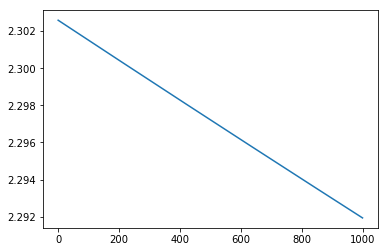

In [12]:
plt.plot(losses)

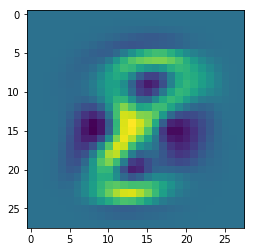

In [13]:
classWeightsToVisualize = 8
plt.imshow(scipy.reshape(w[:,classWeightsToVisualize],[28,28]))

In [86]:
for i in range(w.shape[0]) : 
    for ss in range(w.shape[1]):
        if w[i][ss] != 0.0 : 
            print(w[i][ss])

-8.98395783522e-12
-8.98395783522e-12
-1.8538328057e-12
-8.98395783522e-12
-8.98395783522e-12
-8.98395783522e-12
7.37254954875e-11
-8.98395783522e-12
-8.98395783522e-12
-8.98395783522e-12
-3.35115887902e-11
-3.35115887902e-11
1.20499118892e-10
-3.35115887902e-11
-3.35115887902e-11
-3.35115887902e-11
1.4759359143e-10
-3.35115887902e-11
-3.35115887902e-11
-3.35115887902e-11
-1.54010707682e-11
-1.54010707682e-11
1.38609636914e-10
-1.54010707682e-11
-1.54010707682e-11
-1.54010707682e-11
-1.54010707682e-11
-1.54010707682e-11
-1.54010707682e-11
-1.54010707682e-11
-6.4171125943e-13
-6.4171125943e-13
5.77540133487e-12
-6.4171125943e-13
-6.4171125943e-13
-6.4171125943e-13
-6.4171125943e-13
-6.4171125943e-13
-6.4171125943e-13
-6.4171125943e-13
-1.14082003182e-12
-1.14082003182e-12
-1.14082003182e-12
-1.14082003182e-12
-1.14082003182e-12
-1.14082003182e-12
1.02673802863e-11
-1.14082003182e-12
-1.14082003182e-12
-1.14082003182e-12
-3.92156873237e-12
-3.92156873237e-12
-3.92156873237e-12
-3.9215687

3.08444296769e-07
3.03164435862e-07
-2.7428158388e-07
-8.15015379015e-08
8.72984731097e-08
-3.25326150021e-07
1.1991665433e-07
-2.91500836431e-07
1.99922862455e-07
3.89189324848e-08
2.89824474108e-07
2.54859051713e-07
-2.93237235621e-07
-8.12714487836e-08
9.21182240158e-08
-3.47057559446e-07
1.57160648741e-07
-3.11237949667e-07
2.32630815201e-07
4.56233181773e-08
2.5723117427e-07
1.89859332926e-07
-2.63312171799e-07
-6.26939785233e-08
7.51905221981e-08
-3.40677594943e-07
1.75691059995e-07
-3.09542477504e-07
2.30627249964e-07
4.31598597923e-08
2.13224041574e-07
1.1460014904e-07
-1.97504681459e-07
-2.39082368864e-08
3.859658077e-08
-3.07511817627e-07
1.71646853088e-07
-2.82929998256e-07
2.00026036141e-07
3.78541909945e-08
1.4729020525e-07
5.0677721013e-08
-1.12782537596e-07
2.23568636728e-08
1.46631085571e-09
-2.5287381108e-07
1.41464891514e-07
-2.35479870766e-07
1.514518447e-07
2.77905184307e-08
8.52343723004e-08
9.9174337432e-09
-4.20134071971e-08
6.69498787775e-08
-2.73189316315e-08
-

-1.97178692387e-07
8.56477054974e-08
2.55902260965e-07
-1.5903102189e-08
2.57889426751e-07
4.31332641766e-08
-3.15014349833e-07
2.86191818028e-08
-4.15348329665e-08
1.04012412394e-07
-1.64855339415e-07
1.48391024677e-07
1.53056265456e-07
-6.76688807207e-08
1.1186125443e-07
3.19291568931e-07
-2.14542329613e-07
-1.69765427689e-08
-8.07134447808e-08
2.01421759044e-08
-1.30644998617e-07
1.75412772578e-07
2.39182903315e-08
-8.00774375266e-08
-1.58100544396e-08
4.65728440298e-07
-1.44479081399e-07
-5.63150833678e-08
-9.20027860963e-08
-2.67250638573e-08
-1.05451628188e-07
1.5476157723e-07
-5.21090225206e-08
-7.51935158001e-08
-6.8213836299e-08
4.35720667081e-07
-9.37517345366e-08
-5.92611799486e-08
-7.94722327984e-08
-3.8143888047e-08
-7.72347995123e-08
1.03103178977e-07
-6.35891659611e-08
-5.89260640066e-08
-6.84447812468e-08
2.90079874343e-07
-5.34830690455e-08
-3.89297704773e-08
-5.08270974237e-08
-2.7120144173e-08
-4.76427835364e-08
5.54374362401e-08
-4.41832467808e-08
-3.67957240859e-08

-7.16228204545e-09
1.640007214e-08
-2.4339324046e-08
6.4997579571e-08
7.37341219435e-08
-2.54202510146e-08
-8.89618592046e-09
-2.55001084209e-08
-2.53396805952e-08
-2.03742614256e-08
-2.52619622316e-08
9.27411819223e-08
-5.63254935012e-08
1.19539757329e-07
1.18708384795e-07
-6.35390411023e-08
5.52406442051e-09
-6.29800392899e-08
-6.36951908412e-08
-2.66235309536e-08
-6.3350092779e-08
2.05059904958e-07
-1.00242786515e-07
1.82234235123e-07
1.56438868225e-07
-1.24472377968e-07
5.34812865259e-08
-1.14489489726e-07
-1.22993589999e-07
-1.1063458804e-08
-1.2395259182e-07
3.19190464235e-07
-1.37300827875e-07
2.36463899437e-07
1.75740901489e-07
-1.93564645732e-07
1.05621111243e-07
-1.56462326356e-07
-1.89489779252e-07
3.39861694767e-08
-1.94184966665e-07
3.93636885936e-07
-1.35518938201e-07
2.7431851857e-07
1.78761293509e-07
-2.58206289525e-07
1.21951307975e-07
-1.61004144782e-07
-2.44807358201e-07
9.20375812099e-08
-2.6116885649e-07
4.10336208997e-07
-8.97158694252e-08
2.7551695017e-07
1.46267

In [91]:
'''
A logistic regression learning algorithm example using TensorFlow library.
This example is using the MNIST database of handwritten digits
(http://yann.lecun.com/exdb/mnist/)

Author: Aymeric Damien
Project: https://github.com/aymericdamien/TensorFlow-Examples/
'''

from __future__ import print_function

import tensorflow as tf

# Import MNIST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

# Parameters
learning_rate = 0.01
training_epochs = 25
batch_size = 100
display_step = 1

# tf Graph Input
x = tf.placeholder(tf.float32, [None, 784]) # mnist data image of shape 28*28=784
y = tf.placeholder(tf.float32, [None, 10]) # 0-9 digits recognition => 10 classes

# Set model weights
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))

# Construct model
pred = tf.nn.softmax(tf.matmul(x, W) + b) # Softmax

# Minimize error using cross entropy
cost = tf.reduce_mean(-tf.reduce_sum(y*tf.log(pred), reduction_indices=1))
# Gradient Descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

# Start training
with tf.Session() as sess:

    # Run the initializer
    sess.run(init)

    # Training cycle
    for epoch in range(training_epochs):
        avg_cost = 0.
        total_batch = int(mnist.train.num_examples/batch_size)
        # Loop over all batches
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            # Run optimization op (backprop) and cost op (to get loss value)
            _, c = sess.run([optimizer, cost], feed_dict={x: batch_xs,
                                                          y: batch_ys})
            # Compute average loss
            avg_cost += c / total_batch
        # Display logs per epoch step
        if (epoch+1) % display_step == 0:
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(avg_cost))

    print("Optimization Finished!")

    # Test model
    correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
    # Calculate accuracy
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    print("Accuracy:", accuracy.eval({x: mnist.test.images, y: mnist.test.labels}))

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
Epoch: 0001 cost= 1.183326472
Epoch: 0002 cost= 0.665328652
Epoch: 0003 cost= 0.552777038
Epoch: 0004 cost= 0.498647930
Epoch: 0005 cost= 0.465576231
Epoch: 0006 cost= 0.442617643
Epoch: 0007 cost= 0.425515069
Epoch: 0008 cost= 0.412167466
Epoch: 0009 cost= 0.401386164
Epoch: 0010 cost= 0.392368803
Epoch: 0011 cost= 0.384789024
Epoch: 0012 cost= 0.378212313
Epoch: 0013 cost= 0.372434621
Epoch: 0014 cost= 0.367274282
Epoch: 0015 cost= 0.362762790
Epoch: 0016 cost= 0.358594723
Epoch: 0017 cost= 0.354872219
Epoch: 0018 cost= 0.351471041
Epoch: 0019 c

In [18]:
print ('Training Accuracy: ', getAccuracy(x,y))
testX = mnist_test_images
testY = mnist_test_labels
print ( 'Test Accuracy: ', getAccuracy(testX,testY))

Returning softmax :  [[ 0.10031111  0.0985211   0.10049183 ...,  0.10059569  0.1002498
   0.10037584]
 [ 0.10054284  0.09903699  0.10006282 ...,  0.09972116  0.10124814
   0.1000362 ]
 [ 0.09987067  0.09837767  0.09959041 ...,  0.10028697  0.10067844
   0.10086504]
 ..., 
 [ 0.10032916  0.09902812  0.0993012  ...,  0.0999877   0.10082959
   0.10031312]
 [ 0.10116639  0.09902778  0.10023411 ...,  0.09955937  0.09992293
   0.09978551]
 [ 0.1005997   0.09929702  0.10022202 ...,  0.09975956  0.10085622
   0.10004346]]
Training Accuracy:  0.6657090909090909
Returning softmax :  [[ 0.10019578  0.09896887  0.09984197 ...,  0.10142222  0.10016927
   0.10050589]
 [ 0.10076614  0.09959125  0.10093993 ...,  0.0987798   0.10054131
   0.09911033]
 [ 0.09965234  0.10103782  0.10020976 ...,  0.09975725  0.10034396
   0.09975368]
 ..., 
 [ 0.09950495  0.098975    0.09985613 ...,  0.10027425  0.10096903
   0.10067787]
 [ 0.1003811   0.09973465  0.1000378  ...,  0.09980362  0.10074794
   0.09977069]
 [ 

In [14]:
def getAccuracy(someX,someY):
    prob,prede = getProbsAndPreds(someX)
    c = 0;
    for i in range(len(someY)):
        test = someY[i, prede[i]]
#         print("test",test,"from the row : ", someY[i], "prede", prede[i]), 
        if  test == 1:
            c+=1
    accuracy = c/(float(len(someY)))        
#     accuracy = sum(prede == someY)/(float(len(someY)))
    return accuracy

In [20]:
prob,prede = getProbsAndPreds(x)

Returning softmax :  [[ 0.10031111  0.0985211   0.10049183 ...,  0.10059569  0.1002498
   0.10037584]
 [ 0.10054284  0.09903699  0.10006282 ...,  0.09972116  0.10124814
   0.1000362 ]
 [ 0.09987067  0.09837767  0.09959041 ...,  0.10028697  0.10067844
   0.10086504]
 ..., 
 [ 0.10032916  0.09902812  0.0993012  ...,  0.0999877   0.10082959
   0.10031312]
 [ 0.10116639  0.09902778  0.10023411 ...,  0.09955937  0.09992293
   0.09978551]
 [ 0.1005997   0.09929702  0.10022202 ...,  0.09975956  0.10085622
   0.10004346]]


In [21]:
prob[0]

array([ 0.10031111,  0.0985211 ,  0.10049183,  0.09994644,  0.10012284,
        0.09914924,  0.10023612,  0.10059569,  0.1002498 ,  0.10037584])

In [120]:
prede.shape

(55000,)

In [117]:
y[0,3]

0.0

In [22]:
prede

array([7, 3, 9, ..., 8, 0, 8], dtype=int64)